In [1]:
import os
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Install scikit-learn in THIS notebook's environment
%pip install --upgrade pip setuptools wheel
%pip install -U numpy scipy scikit-learn

# Verify install
import sklearn, sys
print("Python:", sys.version)
print("scikit-learn:", sklearn.__version__)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Python: 3.12.5 (v3.12.5:ff3bc82f7c9, Aug  7 2024, 05:32:06) [Clang 13.0.0 (clang-1300.0.29.30)]
scikit-learn: 1.7.2


### Load Data

In [2]:
#load and preprocess the data
df = pd.read_csv("insurance.csv")
df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Univariate Exploratory Data Analysis

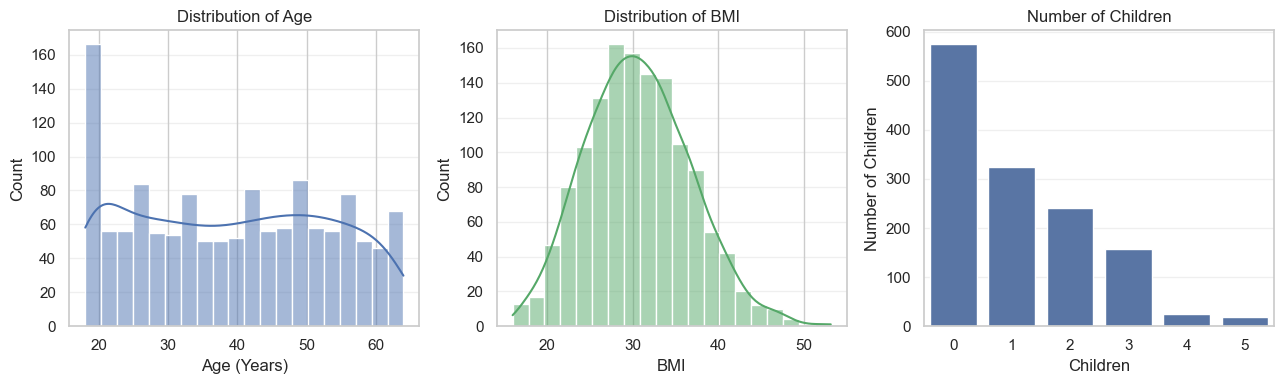

In [3]:
sns.set(style="whitegrid", palette=["#4C72B0", "#003366"])

fig, axes = plt.subplots(1, 3, figsize=(13, 4))

sns.histplot(df['age'], bins=20, kde=True, ax=axes[0], color="#4C72B0")
axes[0].set_title("Distribution of Age")
axes[0].set_xlabel("Age (Years)")
axes[0].set_ylabel("Count")
axes[0].grid(axis="y", alpha=0.3)


sns.histplot(df['bmi'], bins=20, kde=True, ax=axes[1], color="#55A868")
axes[1].set_title("Distribution of BMI")
axes[1].set_xlabel("BMI")
axes[1].set_ylabel("Count")
axes[1].grid(axis="y", alpha=0.3)

sns.countplot(x='children', data=df, ax=axes[2], color="#4C72B0")
axes[2].set_title("Number of Children")
axes[2].set_xlabel("Children")
axes[2].set_ylabel("Number of Children")
axes[2].grid(axis="y", alpha=0.3)

plt.tight_layout()
plt.show()

/var/folders/nh/r108gvkd3sz7mwcnj2bcx7vr0000gn/T/ipykernel_66030/2048787621.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='smoker', data=df, ax=axes[1], palette=["#55A868", "#C44E52"])
/var/folders/nh/r108gvkd3sz7mwcnj2bcx7vr0000gn/T/ipykernel_66030/2048787621.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='region', data=df, ax=axes[2], palette="Set2")


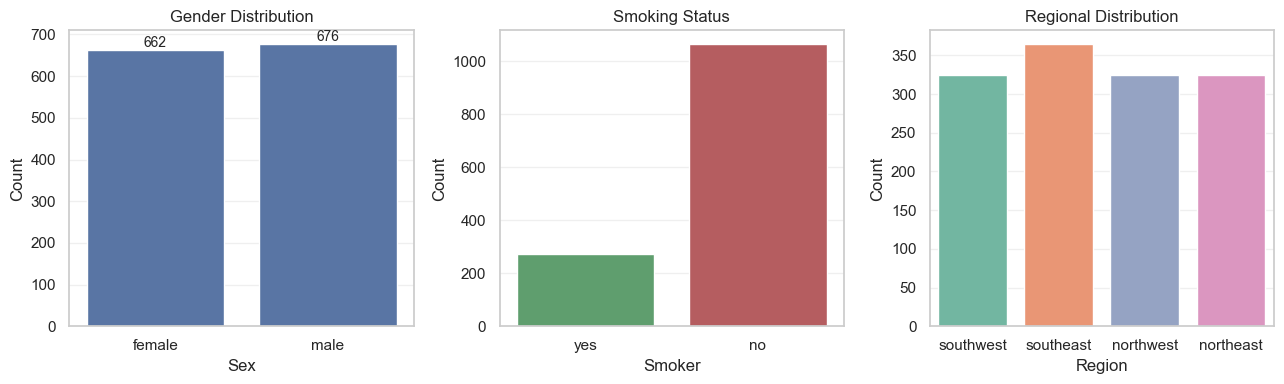

In [4]:
fig, axes = plt.subplots(1, 3, figsize=(13, 4))
sns.set(style="whitegrid")

# Gender
sns.countplot(x='sex', data=df, ax=axes[0], color="#4C72B0")
axes[0].set_title("Gender Distribution")
axes[0].set_xlabel("Sex")
axes[0].set_ylabel("Count")
axes[0].grid(axis="y", alpha=0.3)

# Add count labels
for p in axes[0].patches:
    axes[0].annotate(
        f'{int(p.get_height())}',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='bottom',
        fontsize=10, 
    )

# Smoker
sns.countplot(x='smoker', data=df, ax=axes[1], palette=["#55A868", "#C44E52"])
axes[1].set_title("Smoking Status")
axes[1].set_xlabel("Smoker")
axes[1].set_ylabel("Count")
axes[1].grid(axis="y", alpha=0.3)

# Region
sns.countplot(x='region', data=df, ax=axes[2], palette="Set2")
axes[2].set_title("Regional Distribution")
axes[2].set_xlabel("Region")
axes[2].set_ylabel("Count")
axes[2].grid(axis="y", alpha=0.3)

plt.tight_layout()
plt.show()

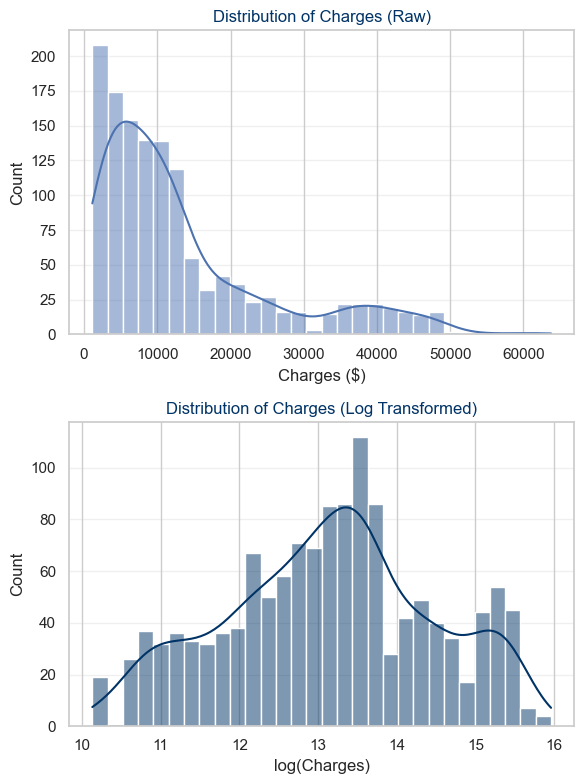

In [5]:
sns.set(style="whitegrid")

# Create a log-transformed version (handle zeros safely)
df["log_charges"] = np.log2(df["charges"])

fig, axes = plt.subplots(2, 1, figsize=(6, 8))

# -------------------------------------
# 1️⃣ Raw (non-log) charges
# -------------------------------------
sns.histplot(df["charges"], bins=30, kde=True, ax=axes[0], color="#4C72B0")
axes[0].set_title("Distribution of Charges (Raw)", fontsize=12, color="#003366")
axes[0].set_xlabel("Charges ($)")
axes[0].set_ylabel("Count")
axes[0].grid(axis="y", alpha=0.3)

# -------------------------------------
# 2️⃣ Log-transformed charges
# -------------------------------------
sns.histplot(df["log_charges"], bins=30, kde=True, ax=axes[1], color="#003366")
axes[1].set_title("Distribution of Charges (Log Transformed)", fontsize=12, color="#003366")
axes[1].set_xlabel("log(Charges)")
axes[1].set_ylabel("Count")
axes[1].grid(axis="y", alpha=0.3)

plt.tight_layout()
plt.show()

## Bivariate Exploratory Data Analysis

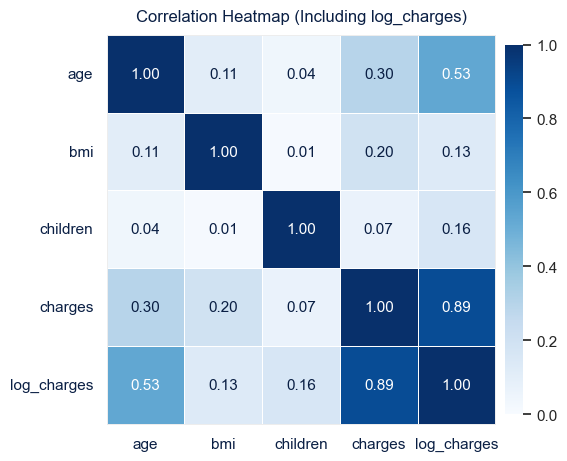

In [6]:
#Correlation Heatmap
sns.set(style="whitegrid")
df["log_charges"] = np.log(df["charges"])
cols = ["age", "bmi", "children", "charges", "log_charges"]
corr = df[cols].corr()

plt.figure(figsize=(6, 5))
cmap = "Blues"
vmin, vmax = 0, 1

ax = sns.heatmap(
    corr,
    cmap=cmap,
    vmin=vmin, vmax=vmax,
    annot=True, fmt=".2f",
    annot_kws={"size": 11},      
    linewidths=0.5, linecolor="white",
    square=True,
    cbar=True, cbar_kws={"shrink": 0.9, "pad": 0.02}
)

ax.set_title("Correlation Heatmap (Including log_charges)", fontsize=12, color="#0a1f44", pad=10)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha="center", fontsize=11, color="#0a1f44")
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, va="center", fontsize=11, color="#0a1f44")
norm_mid = (vmin + vmax) / 2
dark_color = "#0a1f44"
light_color = "#FFFFFF"

vals = corr.values.ravel()
for txt, val in zip(ax.texts, vals):
    txt.set_color(light_color if val >= norm_mid else dark_color)

for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_linewidth(0.5)
    spine.set_edgecolor("#e6e6e6")

plt.tight_layout()
plt.show()

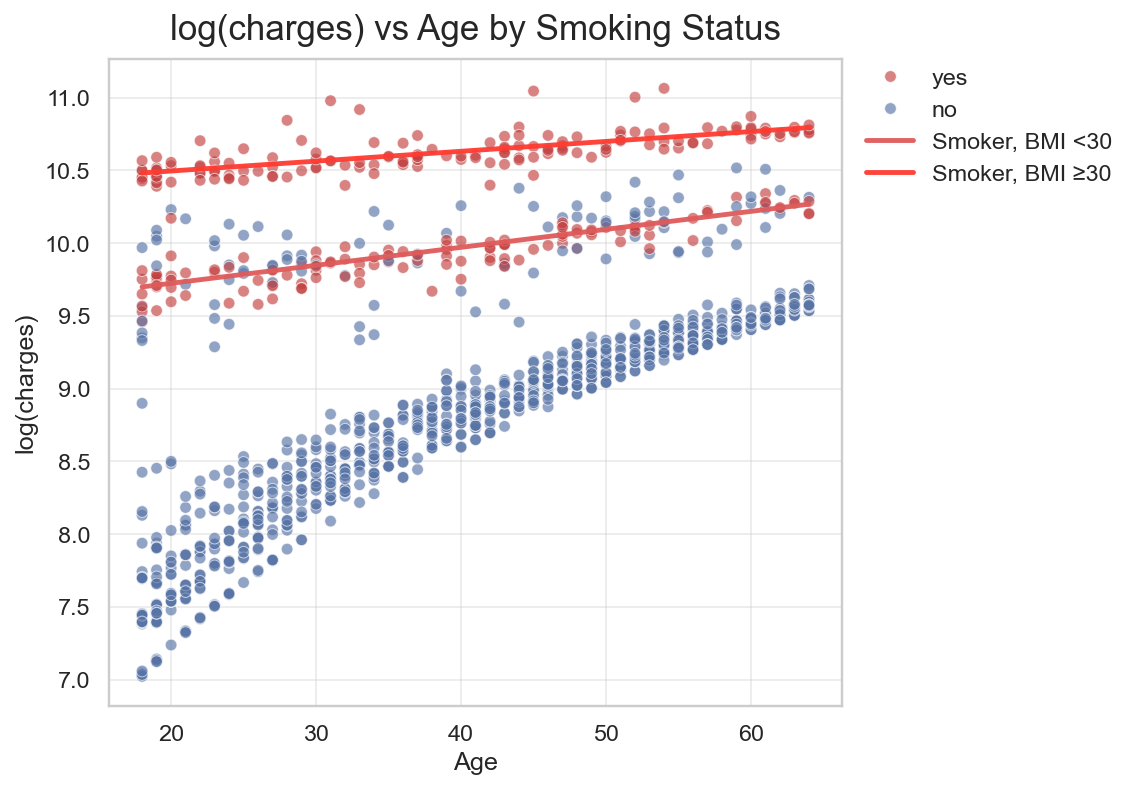

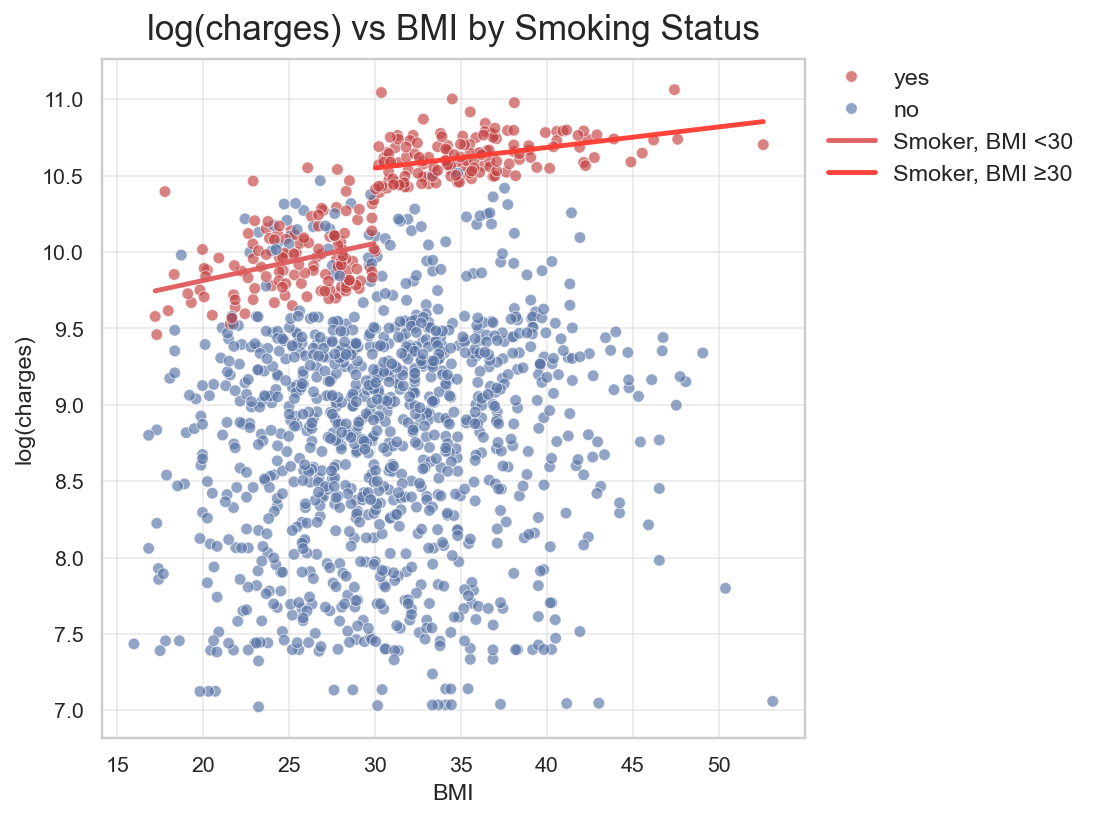

In [7]:

import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

try:
    df
except NameError:
    df = pd.read_csv("insurance.csv")

# Target transform
if "charges_log" not in df.columns:
    df["charges_log"] = np.log(df["charges"])

df["obese"] = df["bmi"] >= 30  

sns.set_theme(style="whitegrid")
plt.rcParams.update({
    "figure.dpi": 140,
    "font.size": 12,
    "axes.titleweight": "semibold",
    "axes.titlepad": 10,
    "legend.frameon": False,
    "grid.alpha": 0.35,
})

COLORS = {
    "navy":  "#0B2F6B", 
    "ice":   "#A9BFDF", 
    "slate": "#5874A6", 
    "red":   "#C34040",
    "red_light":  "#E05A5A",
    "red_crimson": "#FF3B30",
}
SMOKER_PAL = {"yes": COLORS["red"], "no": COLORS["slate"]}
LINE_COLS  = {False: COLORS["red_light"], True: COLORS["red_crimson"]}  

def add_trendlines_for_smokers(ax, x, y, smoker, obese, prefix_label):
    """
    Adds two OLS lines ONLY for smoker=='yes':
      - BMI < 30
      - BMI ≥ 30
    """
    x = np.asarray(x); y = np.asarray(y)
    smoker = np.asarray(smoker)
    obese = np.asarray(obese)

    m_smoker = (smoker == "yes") | (smoker == 1) 
    for group in (False, True):
        m = m_smoker & (obese == group) & np.isfinite(x) & np.isfinite(y)
        if m.sum() < 2:
            continue
        a, b = np.polyfit(x[m], y[m], 1) 
        x_line = np.linspace(x[m].min(), x[m].max(), 200)
        y_line = a * x_line + b
        label = f"Smoker, BMI {'≥30' if group else '<30'}"
        ax.plot(x_line, y_line, color=LINE_COLS[group], linewidth=2.5, alpha=0.95, label=label)

# First Plot: log(charges) vs Age
fig1, ax1 = plt.subplots(figsize=(8, 6))

sns.scatterplot(
    data=df, x="age", y="charges_log",
    hue="smoker", palette=SMOKER_PAL, alpha=0.65, s=36, ax=ax1
)

add_trendlines_for_smokers(
    ax1,
    x=df["age"], y=df["charges_log"],
    smoker=df["smoker"], obese=df["obese"],
    prefix_label="Trend"
)

ax1.set_title(
    "log(charges) vs Age by Smoking Status",
    fontweight="normal",
    fontsize=18  # larger title
)
ax1.set_xlabel("Age", fontsize=13)
ax1.set_ylabel("log(charges)", fontsize=13)
ax1.tick_params(axis="both", labelsize=12)

handles, labels = ax1.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
legend = ax1.legend(
    by_label.values(), by_label.keys(),
    loc="upper left", bbox_to_anchor=(1.02, 1),
    borderaxespad=0., frameon=False,
    fontsize=12  # larger legend text
)
fig1.subplots_adjust(right=0.78)
plt.show()

# Second Plot: log(charges) vs BMI 
fig2, ax2 = plt.subplots(figsize=(8, 6))

sns.scatterplot(
    data=df, x="bmi", y="charges_log",
    hue="smoker", palette=SMOKER_PAL, alpha=0.65, s=36, ax=ax2
)

add_trendlines_for_smokers(
    ax2,
    x=df["bmi"], y=df["charges_log"],
    smoker=df["smoker"], obese=df["obese"],
    prefix_label="Trend"
)

ax2.set_title("log(charges) vs BMI by Smoking Status", fontweight="normal", fontsize=18)
ax2.set_xlabel("BMI")
ax2.set_ylabel("log(charges)")

handles, labels = ax2.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax2.legend(
    by_label.values(), by_label.keys(),
    loc="upper left", bbox_to_anchor=(1.02, 1),  
    borderaxespad=0., frameon=False, fontsize=12
)
fig2.subplots_adjust(right=0.78)

plt.tight_layout()
plt.show()



/var/folders/nh/r108gvkd3sz7mwcnj2bcx7vr0000gn/T/ipykernel_66030/667292047.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


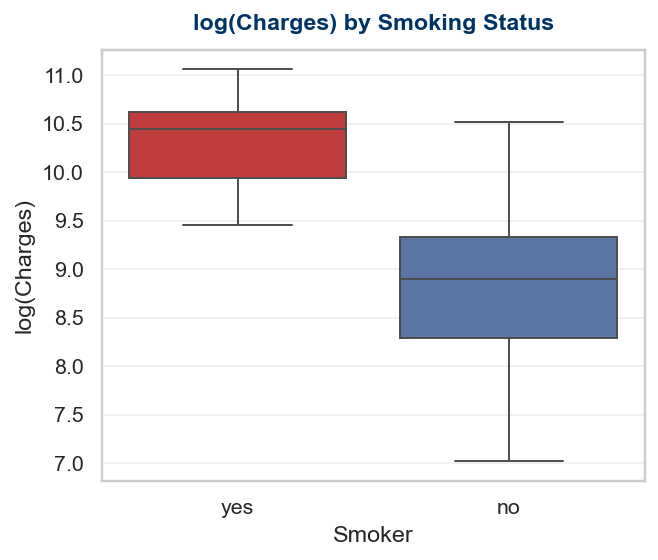

In [8]:
#Boxplots of log(Charges) by Smoking Status
plt.figure(figsize=(5,4))
sns.boxplot(
    x="smoker", y="log_charges", data=df,
    palette=["#D62728", "#4C72B0"]
)
plt.title("log(Charges) by Smoking Status", fontsize=12, color="#003366")
plt.xlabel("Smoker")
plt.ylabel("log(Charges)")
plt.grid(axis="y", alpha=0.3)
plt.show()

/var/folders/nh/r108gvkd3sz7mwcnj2bcx7vr0000gn/T/ipykernel_66030/2877930309.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


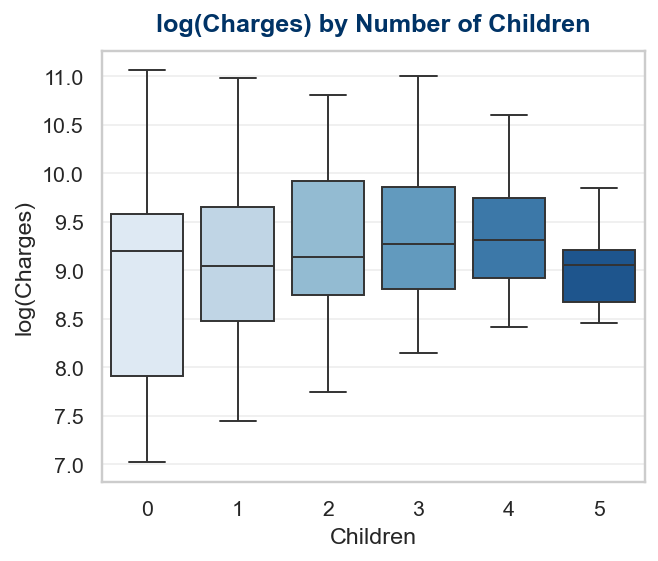

In [9]:
#Boxplot of log(Charges) by Number of Children
plt.figure(figsize=(5,4))
sns.boxplot(
    x="children", y="log_charges", data=df,
    palette="Blues"
)
plt.title("log(Charges) by Number of Children", fontsize=13, color="#003366")
plt.xlabel("Children")
plt.ylabel("log(Charges)")
plt.grid(axis="y", alpha=0.3)
plt.show()


/var/folders/nh/r108gvkd3sz7mwcnj2bcx7vr0000gn/T/ipykernel_66030/3078154544.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


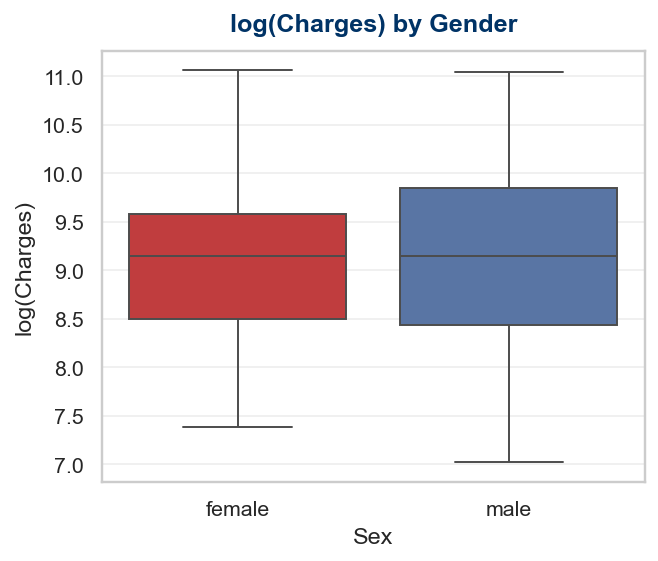

In [10]:
#Boxplot of log(Charges) by Gender
plt.figure(figsize=(5,4))
sns.boxplot(
    x="sex", y="log_charges", data=df,
    palette=["#D62728", "#4C72B0"]
)
plt.title("log(Charges) by Gender", fontsize=13, color="#003366")
plt.xlabel("Sex")
plt.ylabel("log(Charges)")
plt.grid(axis="y", alpha=0.3)
plt.show()

/var/folders/nh/r108gvkd3sz7mwcnj2bcx7vr0000gn/T/ipykernel_66030/2219792801.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


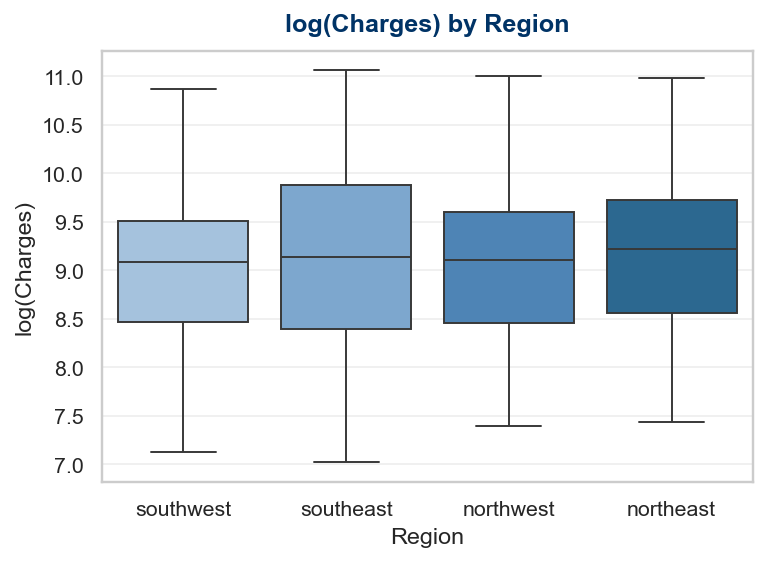

In [11]:
#Boxplot of log(Charges) by Region
plt.figure(figsize=(6,4))
sns.boxplot(
    x="region", y="log_charges", data=df,
    palette = ["#9CC3E6", "#6FA8DC", "#3D85C6", "#1C6BA0"]
)
plt.title("log(Charges) by Region", fontsize=13, color="#003366")
plt.xlabel("Region")
plt.ylabel("log(Charges)")
plt.grid(axis="y", alpha=0.3)
plt.show()

In [12]:
df.dtypes

age              int64
sex             object
bmi            float64
children         int64
smoker          object
region          object
charges        float64
log_charges    float64
charges_log    float64
obese             bool
dtype: object

## Data Preprocessing
### 1. Remove Missing Values
### 2. Remove duplicate 
### 3. One-Hot Encoding

In [13]:
import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

df = df.copy()

#Remove duplicates and report
n_before = len(df)
df = df.drop_duplicates(keep="first").reset_index(drop=True)
n_after = len(df)
print(f"Removed {n_before - n_after} duplicate row(s). New size: {n_after} rows.")

num_cols = ["age", "bmi", "children"]
cat_cols = ["sex", "smoker", "region"]

pre = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(drop="first", handle_unknown="ignore", sparse_output=False), cat_cols),
        ("num", "passthrough", num_cols),
    ],
    remainder="drop",
)

# Log-transform charges 
if (df["charges"] <= 0).any():
    raise ValueError("Found non-positive charges; log(charges) undefined. Clean data first.")
y_log = np.log(df["charges"])

print("y_log shape:", y_log.shape)
print("Encoded columns:", list(cat_cols))

Removed 1 duplicate row(s). New size: 1337 rows.
y_log shape: (1337,)
Encoded columns: ['sex', 'smoker', 'region']


### Train Linear Regression Baseline Model

### Feature Engineering

In [14]:
# Ensure smoker is binary (1=yes, 0=no)
df["smoker_bin"] = df["smoker"].map({"yes": 1, "no": 0}).astype(int)

# --- Interaction features ---
df["bmi_x_smoker"] = df["bmi"] * df["smoker_bin"]
df["age_x_smoker"] = df["age"] * df["smoker_bin"]

# --- Nonlinear interaction: smoker AND high BMI (binary & piecewise-linear) ---
df["smoker_obese"] = ((df["smoker_bin"] == 1) & (df["bmi"] > 30)).astype(int)
df["bmi_excess_30"] = np.maximum(df["bmi"] - 30, 0.0)
df["bmi_excess_30_x_smoker"] = df["bmi_excess_30"] * df["smoker_bin"]
# keep main effects: bmi, smoker_bin, and bmi_x_smoker

# (optional) keep everything tidy
feature_cols = ["age","bmi","children","smoker_bin","bmi_x_smoker","age_x_smoker","bmi_excess_30","bmi_excess_30_x_smoker","charges"]
df[feature_cols].head()

,age,bmi,children,smoker_bin,bmi_x_smoker,age_x_smoker,bmi_excess_30,bmi_excess_30_x_smoker,charges
0,19,27.900,0,1,27.9,19,0.00,0.0,16884.92400
1,18,33.770,1,0,0.0,0,3.77,0.0,1725.55230
2,28,33.000,3,0,0.0,0,3.00,0.0,4449.46200
3,33,22.705,0,0,0.0,0,0.00,0.0,21984.47061
4,32,28.880,0,0,0.0,0,0.00,0.0,3866.85520


### Train Linear Regression & Elastic Net Model

In [15]:
# ===============================
# Group-wise Duan smearing helpers
# ===============================
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score

def _mk_children_bin_if_needed(df: pd.DataFrame) -> pd.Series:
    # Create children_bin if missing: 0, 1-2, 3-5, 6+
    if "children_bin" in df.columns:
        return df["children_bin"]
    if "children" in df.columns:
        bins = [-0.1, 0, 2, 5, np.inf]
        labels = ["0", "1-2", "3-5", "6+"]
        return pd.cut(df["children"], bins=bins, labels=labels, include_lowest=True)
    raise KeyError("Neither 'children_bin' nor 'children' found for grouping.")

def _std_group_col(df: pd.DataFrame, group_col: str) -> pd.Series:
    # Standardize group column access and 'sex' normalization
    if group_col.lower() == "children_bin":
        return _mk_children_bin_if_needed(df)
    if group_col.lower() == "sex":
        for c in ("sex","Sex","SEX","gender","Gender"):
            if c in df.columns:
                s = df[c].astype(str).str.strip().str.lower()
                s = s.replace({"m":"male","f":"female"})
                return s
        raise KeyError("No 'sex'/'gender' column found for grouping.")
    if group_col not in df.columns:
        for c in (group_col.lower(), group_col.upper(), group_col.capitalize()):
            if c in df.columns:
                group_col = c
                break
    if group_col not in df.columns:
        raise KeyError(f"Group column '{group_col}' not found in DataFrame.")
    return df[group_col]

def duan_group_smear_predict(pipe: Pipeline, X_train: pd.DataFrame, y_train_log: np.ndarray,
                             X_test: pd.DataFrame, group_col: str):
    # Fit if needed
    try:
        _ = pipe.predict(X_train.iloc[:1])
    except Exception:
        pipe.fit(X_train, y_train_log)

    # Log-space preds
    yhat_tr_log = pipe.predict(X_train)
    yhat_te_log = pipe.predict(X_test)

    # Residuals (log)
    resid_log = y_train_log - yhat_tr_log

    # Group vectors
    g_tr = _std_group_col(X_train, group_col)
    g_te = _std_group_col(X_test, group_col)

    # c_g = E[exp(residual) | group]
    exp_resid = np.exp(resid_log)
    c_map = pd.DataFrame({"g": g_tr.values, "exp_resid": exp_resid}).groupby("g", dropna=False)["exp_resid"].mean().to_dict()
    c_global = float(exp_resid.mean())

    # Back-transform
    y_pred_before = np.exp(yhat_te_log)
    c_vec = g_te.map(c_map).fillna(c_global).astype(float).values
    y_pred_after  = y_pred_before * c_vec

    return y_pred_after, y_pred_before, c_map, c_global

def _metrics_table(y_true, yhat_before, yhat_after, label_before="Before S", label_after="After S"):
    rows = []
    def _row(lbl, yhat):
        return dict(
            Variant  = lbl,
            RMSE     = np.sqrt(mean_squared_error(y_true, yhat)),
            MAE      = mean_absolute_error(y_true, yhat),
            MAPE_pct = mean_absolute_percentage_error(y_true, yhat) * 100.0,
            R2       = r2_score(y_true, yhat),
        )
    rows.append(_row(label_before, yhat_before))
    rows.append(_row(label_after,  yhat_after))
    out = pd.DataFrame(rows)
    out["RMSE"] = out["RMSE"].round(2)
    out["MAE"]  = out["MAE"].round(2)
    out["MAPE_pct"] = out["MAPE_pct"].round(2)
    out["R2"]   = out["R2"].round(4)
    return out

def make_stored(pre, model, X_train, y_train):
    """Fit pipeline, compute global Duan c on training residuals, return {'pipe','c'}."""
    pipe = Pipeline(steps=[("pre", pre), ("model", model)])
    pipe.fit(X_train, y_train)  # y_train is log(charges)
    yhat_tr_log = pipe.predict(X_train)
    resid_log   = y_train - yhat_tr_log
    c = float(np.mean(np.exp(resid_log)))  # Duan smearing factor
    return {"pipe": pipe, "c": c}

def parity_plot_group_smear(y_true_chg, y_pred_before, y_pred_after, title=None, show_points=True):
    """
    Actual vs Predicted parity plot with group-wise Duan smearing trends,
    styled to match the 'parity_plot_dual' aesthetic:
      - Points (after-smearing): #5874A6
      - Trend (before): #0B2F6B
      - Trend (after):  #C34040
      - Ideal line: dashed black
      - Axes formatted as currency
      - Smooth lines use LOWESS with linewidth=3
    """
    # --- Prepare data frame like the 'parity_plot_dual' helper ---
    vis_df = pd.DataFrame({
        "Actual":      np.asarray(y_true_chg, dtype=float),
        "Pred_Before": np.asarray(y_pred_before, dtype=float),
        "Pred_After":  np.asarray(y_pred_after, dtype=float),
    }).sort_values("Actual")

    # --- Style (try seaborn theme; fall back gracefully) ---
    try:
        import seaborn as sns
        sns.set_theme(style="whitegrid", context="talk")
    except Exception:
        plt.style.use("default")

    fig, ax = plt.subplots(figsize=(9, 7))

    # --- Scatter (points after smearing only, to match the reference style) ---
    if show_points:
        ax.scatter(
            vis_df["Actual"], vis_df["Pred_After"],
            s=35, alpha=0.5,
            edgecolor="white", linewidth=0.3,
            color="#5874A6",
            label="After smearing (points)"
        )

    # --- Identity line (dashed black) ---
    lo = float(min(vis_df["Actual"].min(),
                   vis_df[["Pred_Before", "Pred_After"]].min().min()))
    hi = float(max(vis_df["Actual"].max(),
                   vis_df[["Pred_Before", "Pred_After"]].max().max()))
    ax.plot([lo, hi], [lo, hi],
            linestyle="--", linewidth=1.5, color="black", alpha=0.9,
            label="Ideal (y = x)")
    ax.set_xlim(lo, hi)
    ax.set_ylim(lo, hi)

    # --- Helper: LOWESS smooth line with linewidth=3 (and a robust fallback) ---
    def _smooth_line(x, y, color, linestyle, label):
        try:
            xy = lowess(y, x, frac=0.3, it=0, return_sorted=True)
            ax.plot(xy[:, 0], xy[:, 1],
                    lw=3.0, alpha=0.9, color=color, linestyle=linestyle, label=label)
        except Exception:
            tmp = pd.DataFrame({"x": x, "y": y}).sort_values("x")
            q = int(np.clip(len(tmp) // 25, 15, 60))
            tmp["bin"] = pd.qcut(tmp["x"], q=q, duplicates="drop")
            agg = tmp.groupby("bin", observed=False).agg(
                x=("x", "median"), y=("y", "mean")
            ).sort_values("x")
            ax.plot(agg["x"], agg["y"],
                    lw=3.0, alpha=0.9, color=color, linestyle=linestyle, label=label)

    # --- Trend lines (before & after smearing) ---
    _smooth_line(
        vis_df["Actual"].values, vis_df["Pred_Before"].values,
        color="#0B2F6B", linestyle="-", label="Trend (before smearing)"
    )
    _smooth_line(
        vis_df["Actual"].values, vis_df["Pred_After"].values,
        color="#C34040", linestyle="-", label="Trend (after smearing)"
    )

    # --- Labels + money formatting ---
    ax.set_title(title or "Actual vs Predicted — Group-wise Duan Smearing")
    ax.set_xlabel("Actual")
    ax.set_ylabel("Predicted")
    money_fmt = FuncFormatter(lambda x, _: f"${x:,.0f}")
    ax.xaxis.set_major_formatter(money_fmt)
    ax.yaxis.set_major_formatter(money_fmt)

    # Legend & layout (no metrics box)
    ax.legend(loc="upper left", frameon=True)
    plt.tight_layout()
    plt.show()

# =====================================================
# A) Group smearing for your best Linear Regression (lr)
# =====================================================

# --- CONFIG ---
USE_LOG_TARGET = True
features = ['age', 'bmi', 'sex', 'smoker', 'region', 'children']
target   = 'charges'

X = df[features].copy()
y = np.log(df[target]) if USE_LOG_TARGET else df[target].copy()

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

num_cols = ['age', 'bmi', 'children']
cat_cols = ['sex', 'smoker', 'region']

# ✅ Preprocess: scale numeric + one-hot categorical
pre = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols),
        ("cat", Pipeline([
            ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=False)),
            ("scale", StandardScaler(with_mean=False))  # scale one-hot columns too
        ]), cat_cols)
    ]
)

# --- Model ---
lr = LinearRegression()

# --- Build LR pipeline (log-space target) ---
pipe_lr = Pipeline(steps=[("pre", pre), ("model", lr)])

# ===============================
# Fit + Group Smearing (sex, children_bin)
# ===============================
# y on original scale for metrics/plots
y_true_dollars = np.exp(y_test)

# ---- by sex ----
yhat_lr_sex_after, yhat_lr_sex_before, c_map_lr_sex, c_lr_global = duan_group_smear_predict(
    pipe_lr, X_train, y_train, X_test, group_col="sex"
)

# --- by children ---
yhat_lr_child_after, yhat_lr_child_before, c_map_lr_child, c_lr_global = duan_group_smear_predict(
    pipe_lr, X_train, y_train, X_test, group_col="children"
)

metrics_lr_sex = _metrics_table(
    y_true=y_true_dollars,
    yhat_before=yhat_lr_sex_before,
    yhat_after=yhat_lr_sex_after,
    label_before="LR Before S (sex)",
    label_after="LR After S (sex)"
)

display(metrics_lr_sex)

metrics_lr_children = _metrics_table(
    y_true=y_true_dollars,
    yhat_before=yhat_lr_child_before,
    yhat_after=yhat_lr_child_after,
    label_before="LR Before S (children)",
    label_after="LR After S (children)"
)

display(metrics_lr_children)

# ===============================
# Parity plots (styled like your parity_plot_dual)
# ===============================
def _tuple_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae  = mean_absolute_error(y_true, y_pred)
    r2   = r2_score(y_true, y_pred)
    return (rmse, mae, r2)

# --- Sex-wise plot ---
mb = _tuple_metrics(y_true_dollars, yhat_lr_sex_before)
ma = _tuple_metrics(y_true_dollars, yhat_lr_sex_after)
parity_plot_dual(
    y_true=y_true_dollars,
    y_pred_before=yhat_lr_sex_before,
    y_pred_after=yhat_lr_sex_after,
    title="Linear Regression — Actual vs Predicted (before vs after smearing)",
    metrics_before=mb,
    metrics_after=ma,
)

# =====================================================
# B) Group smearing for your best Elastic Net (enet)
# =====================================================
from sklearn.preprocessing import FunctionTransformer

# 1) Feature engineering function (returns a DataFrame)
def _make_fe(df_in: pd.DataFrame) -> pd.DataFrame:
    df = df_in.copy()

    # Normalize categorical text a bit
    if "smoker" in df.columns:
        df["smoker"] = df["smoker"].astype(str).str.strip().str.lower()
    if "sex" in df.columns:
        df["sex"] = df["sex"].astype(str).str.strip().str.lower()

    # Engineered columns
    df["bmi_excess_30"] = (df["bmi"] - 30.0).clip(lower=0.0)  # max(bmi - 30, 0)
    df["smoker_obese"]  = ((df["smoker"] == "yes") & (df["bmi"] >= 30)).astype(int)

    # interactions
    df["bmi_x_smoker"]        = df["bmi"] * (df["smoker"] == "yes").astype(int)
    df["age_x_smoker"]        = df["age"] * (df["smoker"] == "yes").astype(int)
    df["bmi_excess_30_x_smoker"] = df["bmi_excess_30"] * (df["smoker"] == "yes").astype(int)

    return df

fe = FunctionTransformer(_make_fe, validate=False)

# 2) Columns after FE
num_cols_fe = [
    "age", "bmi", "children",
    "bmi_x_smoker", "age_x_smoker",
    "bmi_excess_30", "bmi_excess_30_x_smoker"
]
cat_cols_fe = ["sex", "smoker", "region", "smoker_obese"]

# 3) Preprocessor: FE -> ColumnTransformer (scale nums, one-hot cats then scale)
pre_enet = Pipeline([
    ("fe", fe),
    ("ct", ColumnTransformer(
        transformers=[
            ("num", StandardScaler(), num_cols_fe),
            ("cat", Pipeline([
                ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=False)),
                ("scale",  StandardScaler(with_mean=False)),
            ]), cat_cols_fe),
        ],
        remainder="drop",
    ))
])

# 4) ENet model (same search grid you used)
enet = ElasticNetCV(
    l1_ratio=[0.15, 0.3, 0.5, 0.7, 0.85, 1.0],
    alphas=np.logspace(-4, 1, 30),
    cv=5, max_iter=20000, n_jobs=-1, random_state=42
)

# 5) ENet pipeline
pipe_enet = Pipeline([("prep", pre_enet), ("model", enet)])

# 6) Group-wise smearing on ENet (sex & children_bin)
y_true_dollars = np.exp(y_test)  # because y = log(charges)

# --- by sex ---
yhat_enet_sex_after, yhat_enet_sex_before, c_map_enet_sex, c_enet_global = duan_group_smear_predict(
    pipe_enet, X_train, y_train, X_test, group_col="sex"
)

# --- by children ---
yhat_enet_child_after, yhat_enet_child_before, c_map_enet_child, c_enet_global = duan_group_smear_predict(
    pipe_enet, X_train, y_train, X_test, group_col="children"
)

metrics_enet_sex = _metrics_table(
    y_true=y_true_dollars,
    yhat_before=yhat_enet_sex_before,
    yhat_after=yhat_enet_sex_after,
    label_before="ENet Before S (sex)",
    label_after="ENet After S (sex)"
)
display(metrics_enet_sex)

metrics_enet_children = _metrics_table(
    y_true=y_true_dollars,
    yhat_before=yhat_enet_child_before,
    yhat_after=yhat_enet_child_after,
    label_before="ENet Before S (children)",
    label_after="ENet After S (children)"
)
display(metrics_enet_children)

# 7) Parity plots — same styling
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
def _tuple_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    return (np.sqrt(mse), mean_absolute_error(y_true, y_pred), r2_score(y_true, y_pred))

mb = _tuple_metrics(y_true_dollars, yhat_enet_sex_before)
ma = _tuple_metrics(y_true_dollars, yhat_enet_sex_after)
parity_plot_group_smear(
    y_true_chg=y_true_dollars,
    y_pred_before=yhat_enet_sex_before,
    y_pred_after=yhat_enet_sex_after,
    title="Elastic Net — Actual vs Predicted (before vs after smearing)"
)

NameError: name 'StandardScaler' is not defined

### Train XGBoost Model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

%pip install xgboost
import xgboost as xgb, sys
from xgboost import XGBRegressor

%pip install -U scikit-optimize
from skopt import BayesSearchCV
from skopt.space import Real, Integer

RANDOM_STATE = 42
USE_LOG = True
USE_SMEARING = True

target_col = "charges"
num_cols = ["age", "bmi", "children"]
cat_cols = ["sex", "smoker", "region"]

df = df.copy()
df = df.dropna(subset=[target_col] + num_cols + cat_cols)

X = df[num_cols + cat_cols]
y = df[target_col].astype(float)

if USE_LOG:
    y_model = np.log(y)
else:
    y_model = y

X_train, X_test, y_train, y_test, y_raw_train, y_raw_test = train_test_split(
    X, y_model, y, test_size=0.2, random_state=RANDOM_STATE
)

pre = ColumnTransformer(
    transformers=[
        ("num", "passthrough", num_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat_cols),
    ],
    remainder="drop",
)

xgb = XGBRegressor(
    objective="reg:squarederror",
    tree_method="hist",
    random_state=RANDOM_STATE,
)

pipe = Pipeline([("pre", pre), ("model", xgb)])

search_spaces = {
    "model__learning_rate": Real(1e-3, 0.3, prior="log-uniform"),
    "model__n_estimators":  Integer(200, 1500),
    "model__max_depth":     Integer(3, 12),
    "model__min_child_weight": Integer(1, 12),
    "model__subsample":     Real(0.5, 1.0),
    "model__colsample_bytree": Real(0.5, 1.0),
    "model__gamma":         Real(0.0, 5.0),
    "model__reg_alpha":     Real(1e-4, 10.0, prior="log-uniform"),
    "model__reg_lambda":    Real(1e-4, 10.0, prior="log-uniform"),
}

opt = BayesSearchCV(
    estimator=pipe,
    search_spaces=search_spaces,
    n_iter=50,
    cv=5,
    scoring="neg_root_mean_squared_error",
    n_jobs=-1,
    random_state=RANDOM_STATE,
    verbose=1,
)

opt.fit(X_train, y_train)
print("Best score (CV RMSE):", -opt.best_score_)
print("Best params:")
best_model = opt.best_estimator_

y_pred_test = best_model.predict(X_test)

if USE_LOG:
    if USE_SMEARING:
        y_pred_train = best_model.predict(X_train)
        resid = y_train - y_pred_train
        S_global = float(np.mean(np.exp(resid)))

        sex_train = X_train["sex"].astype(str).str.strip().str.lower()
        S_by_sex = resid.groupby(sex_train).apply(lambda r: float(np.mean(np.exp(r))))

        sex_test = X_test["sex"].astype(str).str.strip().str.lower()
        c_test = sex_test.map(S_by_sex).fillna(S_global).to_numpy()

        y_pred_test_orig = np.exp(y_pred_test) * c_test
        y_test_orig = y_raw_test.values
    else:
        y_pred_test_orig = np.exp(y_pred_test)
        y_test_orig = y_raw_test.values
        c_test = 1.0 
else:
    y_pred_test_orig = y_pred_test
    y_test_orig = y_test
    c_test = 1.0

rmse = mean_squared_error(y_test_orig, y_pred_test_orig) ** 0.5
r2 = r2_score(y_test_orig, y_pred_test_orig)
mae = mean_absolute_error(y_test_orig, y_pred_test_orig)

print("=== BayesSearchCV XGBoost Results ===")
print(f"RMSE: {rmse:,.2f}")
print(f"MAE:  {mae:,.2f}")
print(f"R^2 : {r2:,.4f}")

from sklearn.metrics import mean_absolute_percentage_error
def metrics_table_before_after(fitted, X_test, y_test):
    y_true = np.exp(y_test)  

    rows = []
    for name, obj in fitted.items():
        pipe, c = obj["pipe"], obj["c"]

        y_pred_log    = pipe.predict(X_test)
        y_pred_before = np.exp(y_pred_log)       

        if np.isscalar(c) or (np.ndim(c) == 0):
            y_pred_after = y_pred_before * float(c)
            c_desc = float(c)
        else:
            c_arr = np.asarray(c)
            if len(c_arr) != len(y_true):
                raise ValueError(
                    f"Length mismatch for per-row smearing c: got {len(c_arr)} "
                    f"but expected {len(y_true)}"
                )
            y_pred_after = y_pred_before * c_arr
            c_desc = float(np.mean(c_arr))

        def _metrics(yhat):
            return {
                "RMSE": np.sqrt(mean_squared_error(y_true, yhat)),
                "MAE":  mean_absolute_error(y_true, yhat),
                "MAPE": mean_absolute_percentage_error(y_true, yhat) * 100,
                "R2":   r2_score(y_true, yhat),
            }

        m_before = _metrics(y_pred_before)
        m_after  = _metrics(y_pred_after)

        rows.append({
            "Model": name,
            "RMSE_before": m_before["RMSE"],
            "RMSE_after":  m_after["RMSE"],
            "MAE_before":  m_before["MAE"],
            "MAE_after":   m_after["MAE"],
            "MAPE_before": m_before["MAPE"],
            "MAPE_after":  m_after["MAPE"],
            "R2_before":   m_before["R2"],
            "R2_after":    m_after["R2"],
            "Smearing_c":  c_desc,
        })

    df_metrics = pd.DataFrame(rows).set_index("Model")
    fmt = df_metrics.copy()
    money_cols = ["RMSE_before","RMSE_after","MAE_before","MAE_after"]
    pct_cols   = ["MAPE_before","MAPE_after"]
    r2_cols    = ["R2_before","R2_after"]

    fmt[money_cols] = fmt[money_cols].round(2)
    fmt[pct_cols]   = fmt[pct_cols].round(4)
    fmt[r2_cols]    = fmt[r2_cols].round(4)
    fmt["Smearing_c"] = fmt["Smearing_c"].round(6)

    fmt = fmt.sort_values(by="RMSE_after", ascending=True)

    print("\n=== Metrics Before vs After Smearing (lower is better for RMSE/MAE/MAPE) ===")
    print(fmt.to_string())
    return df_metrics, fmt 

fit = {
    "XGB (Bayes)": {
        "pipe": best_model,  
        "c": c_test         
    }
}
raw_metrics, metrics_pretty = metrics_table_before_after(fit, X_test, y_test)



Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, 

### Plot Actual vs Predicted Values trained on XGBoost Model

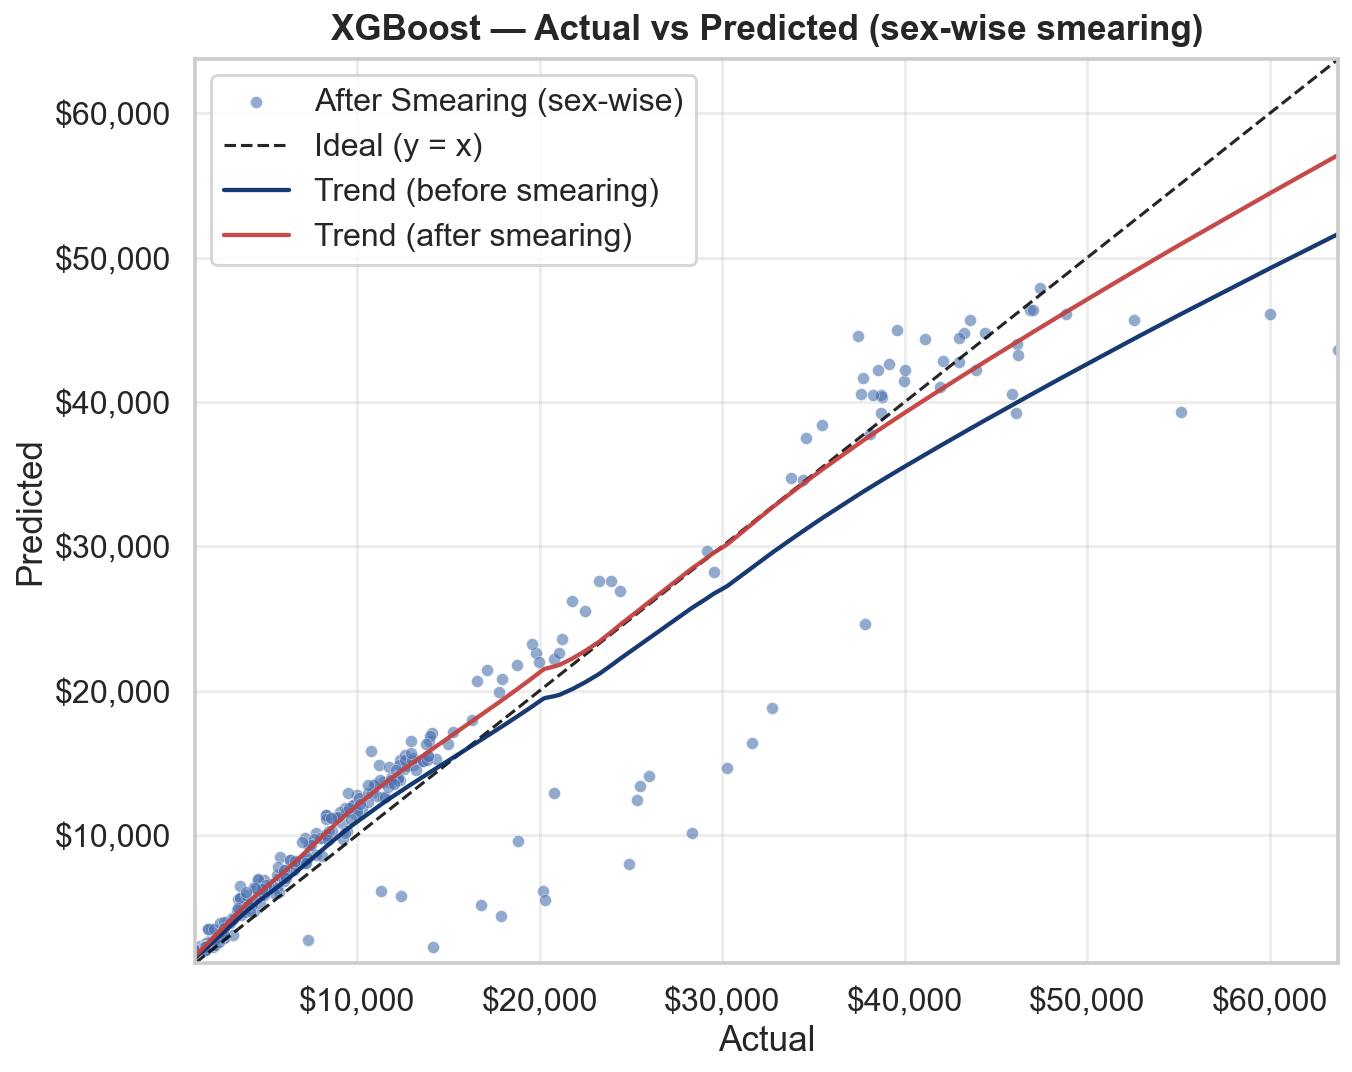

In [ ]:
#Plot the Graph
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.ticker import FuncFormatter

LOG1P = False 

if 'y_test_orig' in globals():
    actual = np.asarray(y_test_orig, dtype=float).ravel()
else:
    actual = np.asarray(y_raw_test, dtype=float).ravel()

if USE_LOG:
    pred_before = np.expm1(y_pred_test) if LOG1P else np.exp(y_pred_test)
else:
    pred_before = np.asarray(y_pred_test, dtype=float)

pred_after = np.asarray(y_pred_test_orig, dtype=float).ravel()
n = min(len(actual), len(pred_before), len(pred_after))
actual, pred_before, pred_after = actual[:n], pred_before[:n], pred_after[:n]

df_before = pd.DataFrame({"Actual": actual, "Predicted": pred_before})
df_after  = pd.DataFrame({"Actual": actual, "Predicted": pred_after})

try:
    from statsmodels.nonparametric.smoothers_lowess import lowess as _lowess
    _HAS_LOESS = True
except Exception:
    _HAS_LOESS = False

def plot_lowess_like(ax, df, color, label, lw=2.2, alpha=0.95, frac=0.3):
    x = np.asarray(df["Actual"], dtype=float)
    y = np.asarray(df["Predicted"], dtype=float)
    m = np.isfinite(x) & np.isfinite(y)
    x, y = x[m], y[m]
    if _HAS_LOESS:
        smoothed = _lowess(y, x, frac=frac, it=1, return_sorted=True)
        ax.plot(smoothed[:,0], smoothed[:,1], lw=lw, alpha=alpha, color=color, label=label)
    else:
        order = np.argsort(x)
        xs, ys = x[order], y[order]
        win = max(5, int(len(xs) * 0.05))
        ys_smooth = pd.Series(ys).rolling(win, center=True, min_periods=1).median().to_numpy()
        ax.plot(xs, ys_smooth, lw=lw, alpha=alpha, color=color, label=label)

sns.set_theme(style="whitegrid", context="talk")
fmt = FuncFormatter(lambda v, _: f"${v:,.0f}")

fig, ax = plt.subplots(figsize=(10, 8))

sns.scatterplot(
    data=df_after, x="Actual", y="Predicted",
    ax=ax, alpha=0.6, s=38, edgecolor="white", linewidth=0.3,
    label="After Smearing (sex-wise)"
)

min_lim = float(min(df_after["Actual"].min(), df_after["Predicted"].min(),
                    df_before["Predicted"].min()))
max_lim = float(max(df_after["Actual"].max(), df_after["Predicted"].max(),
                    df_before["Predicted"].max()))
lims = [min_lim, max_lim]
ax.plot(lims, lims, "--", lw=1.6, color="black", alpha=0.85, label="Ideal (y = x)")
ax.set_xlim(lims); ax.set_ylim(lims)

plot_lowess_like(ax, df_before, color="#0B2F6B", label="Trend (before smearing)")
plot_lowess_like(ax, df_after,  color="#C34040", label="Trend (after smearing)")

ax.set_title("XGBoost — Actual vs Predicted (sex-wise smearing)")
ax.set_xlabel("Actual"); ax.set_ylabel("Predicted")
ax.xaxis.set_major_formatter(fmt); ax.yaxis.set_major_formatter(fmt)
ax.legend(loc="upper left", frameon=True)
plt.tight_layout(); plt.show()


### Train Random Forest Regressor Model

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, KFold
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import (
    make_scorer, mean_squared_error, mean_absolute_error, r2_score
)

from skopt import BayesSearchCV
from skopt.space import Real, Integer

# Config / columns
RANDOM_STATE = 42
target_col = "charges"
num_cols = ["age", "bmi", "children"]
cat_cols = ["sex", "smoker", "region"]
df = df.copy()
df = df.dropna(subset=[target_col] + num_cols + cat_cols)

X = df[num_cols + cat_cols]
y_raw = df[target_col].astype(float)     
y_log = np.log(y_raw)                      

X_train, X_test, y_train, y_test, y_raw_train, y_raw_test = train_test_split(
    X, y_log, y_raw, test_size=0.2, random_state=RANDOM_STATE
)

pre = ColumnTransformer(
    transformers=[
        ("num", "passthrough", num_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat_cols),
    ],
    remainder="drop",
)

rf = RandomForestRegressor(
    n_estimators=700,
    bootstrap=True,
    random_state=RANDOM_STATE,
    n_jobs=-1,
)

pipe = Pipeline([("pre", pre), ("model", rf)])

cv = KFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)
rmse_scorer = make_scorer(lambda yt, yp: -np.sqrt(mean_squared_error(yt, yp)))

search_spaces = {
    "model__max_depth":          Integer(4, 30),
    "model__min_samples_leaf":   Integer(1, 30),
    "model__min_samples_split":  Integer(2, 50),
    "model__max_features":       Real(0.2, 1.0),              
    "model__ccp_alpha":          Real(1e-6, 1e-3, prior="log-uniform"),
}

opt = BayesSearchCV(
    estimator=pipe,
    search_spaces=search_spaces,
    n_iter=40,                             
    cv=cv,
    scoring=rmse_scorer,
    n_jobs=-1,
    random_state=RANDOM_STATE,
    verbose=1,
    refit=True,
)

# Fit on train (log target)
opt.fit(X_train, y_train)

print("Best CV RMSE (log-scale):", -opt.best_score_)
print("Best params:")
for k, v in opt.best_params_.items():
    print(f"  {k}: {v}")

best_rf_pipe = opt.best_estimator_

# Smearing-aware evaluation (sex-wise)
from sklearn.metrics import mean_absolute_percentage_error

# 1) Predictions on LOG scale
y_pred_train_hat = best_rf_pipe.predict(X_train)
y_pred_test_hat  = best_rf_pipe.predict(X_test)

# 2) TRAIN residuals on log scale
resid_log = (np.asarray(y_train) - np.asarray(y_pred_train_hat)).ravel()

# 3) Global fallback smearing factor
S_global = float(np.mean(np.exp(resid_log)))

# 4) Sex-wise smearing factors on TRAIN
resid_log = pd.Series(
    np.asarray(y_train).ravel() - np.asarray(y_pred_train_hat).ravel(),
    index=X_train.index, name="resid_log"
)

sex_train = X_train["sex"].astype(str).str.strip().str.lower()
S_by_sex = resid_log.groupby(sex_train).apply(lambda r: float(np.mean(np.exp(r))))

# 5) Map TRAIN factors to TEST rows (fallback to global if unseen)
sex_test = X_test["sex"].astype(str).str.strip().str.lower()
c_test = sex_test.map(S_by_sex).fillna(S_global).to_numpy()

# 6) Back-transform TEST predictions to original dollars
y_true = np.asarray(y_raw_test, dtype=float)                 
y_pred_before = np.exp(y_pred_test_hat)                      
y_pred_after  = y_pred_before * c_test                       

# 7) Metrics on original scale (after smearing)
mse  = mean_squared_error(y_true, y_pred_after)
rmse = float(np.sqrt(mse))
mae  = mean_absolute_error(y_true, y_pred_after)
mape = mean_absolute_percentage_error(y_true, y_pred_after)  
r2   = r2_score(y_true, y_pred_after)

print(
    f"\n[RandomForest + BayesSearchCV + Sex-wise Smearing] "
    f"Test RMSE: {rmse:,.2f} | MAE: {mae:,.2f} | MAPE: {mape*100:,.2f}% | "
    f"R²: {r2:.3f} | S_global: {S_global:.6f}"
)

# Metrics without smearing for comparison
y_pred_nosmear = y_pred_before
mse_ns  = mean_squared_error(y_true, y_pred_nosmear)
rmse_ns = float(np.sqrt(mse_ns))
mae_ns  = mean_absolute_error(y_true, y_pred_nosmear)
mape_ns = mean_absolute_percentage_error(y_true, y_pred_nosmear)  # fixed to use nosmear
r2_ns   = r2_score(y_true, y_pred_nosmear)

print(
    f"[No Smearing] Test RMSE: {rmse_ns:,.2f} | MAE: {mae_ns:,.2f} | "
    f"MAPE: {mape_ns*100:,.2f}% | R²: {r2_ns:.3f}"
)

y_test_orig      = y_true
y_pred_test_orig = y_pred_after   # after smearing ($)
c_test_sexwise   = c_test         # per-row smearing factors (aligned to X_test)


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

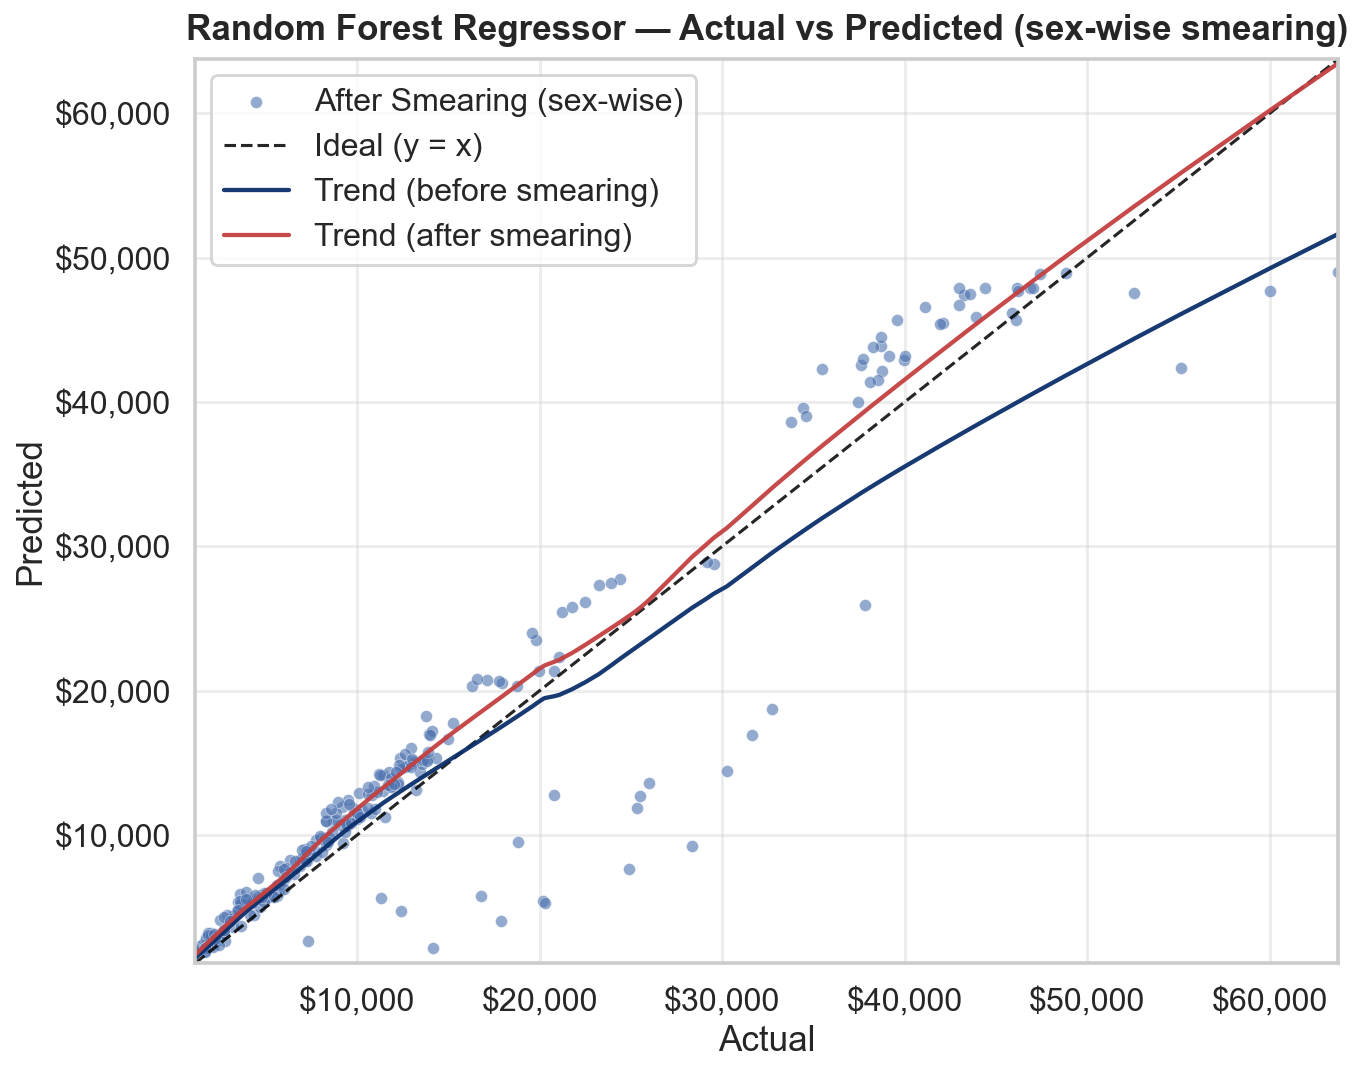

In [ ]:
#Plot the Graph
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.ticker import FuncFormatter

LOG1P = False 

if 'y_test_orig' in globals():
    actual = np.asarray(y_test_orig, dtype=float).ravel()
else:
    actual = np.asarray(y_raw_test, dtype=float).ravel()

if USE_LOG:
    pred_before = np.expm1(y_pred_test) if LOG1P else np.exp(y_pred_test)
else:
    pred_before = np.asarray(y_pred_test, dtype=float)

pred_after = np.asarray(y_pred_test_orig, dtype=float).ravel()
n = min(len(actual), len(pred_before), len(pred_after))
actual, pred_before, pred_after = actual[:n], pred_before[:n], pred_after[:n]

df_before = pd.DataFrame({"Actual": actual, "Predicted": pred_before})
df_after  = pd.DataFrame({"Actual": actual, "Predicted": pred_after})

try:
    from statsmodels.nonparametric.smoothers_lowess import lowess as _lowess
    _HAS_LOESS = True
except Exception:
    _HAS_LOESS = False

def plot_lowess_like(ax, df, color, label, lw=2.2, alpha=0.95, frac=0.3):
    x = np.asarray(df["Actual"], dtype=float)
    y = np.asarray(df["Predicted"], dtype=float)
    m = np.isfinite(x) & np.isfinite(y)
    x, y = x[m], y[m]
    if _HAS_LOESS:
        smoothed = _lowess(y, x, frac=frac, it=1, return_sorted=True)
        ax.plot(smoothed[:,0], smoothed[:,1], lw=lw, alpha=alpha, color=color, label=label)
    else:
        order = np.argsort(x)
        xs, ys = x[order], y[order]
        win = max(5, int(len(xs) * 0.05))
        ys_smooth = pd.Series(ys).rolling(win, center=True, min_periods=1).median().to_numpy()
        ax.plot(xs, ys_smooth, lw=lw, alpha=alpha, color=color, label=label)

sns.set_theme(style="whitegrid", context="talk")
fmt = FuncFormatter(lambda v, _: f"${v:,.0f}")

fig, ax = plt.subplots(figsize=(10, 8))

sns.scatterplot(
    data=df_after, x="Actual", y="Predicted",
    ax=ax, alpha=0.6, s=38, edgecolor="white", linewidth=0.3,
    label="After Smearing (sex-wise)"
)

min_lim = float(min(df_after["Actual"].min(), df_after["Predicted"].min(),
                    df_before["Predicted"].min()))
max_lim = float(max(df_after["Actual"].max(), df_after["Predicted"].max(),
                    df_before["Predicted"].max()))
lims = [min_lim, max_lim]
ax.plot(lims, lims, "--", lw=1.6, color="black", alpha=0.85, label="Ideal (y = x)")
ax.set_xlim(lims); ax.set_ylim(lims)

plot_lowess_like(ax, df_before, color="#0B2F6B", label="Trend (before smearing)")
plot_lowess_like(ax, df_after,  color="#C34040", label="Trend (after smearing)")

ax.set_title("Random Forest Regressor — Actual vs Predicted (sex-wise smearing)")
ax.set_xlabel("Actual"); ax.set_ylabel("Predicted")
ax.xaxis.set_major_formatter(fmt); ax.yaxis.set_major_formatter(fmt)
ax.legend(loc="upper left", frameon=True)
plt.tight_layout(); plt.show()


### Feature Impact

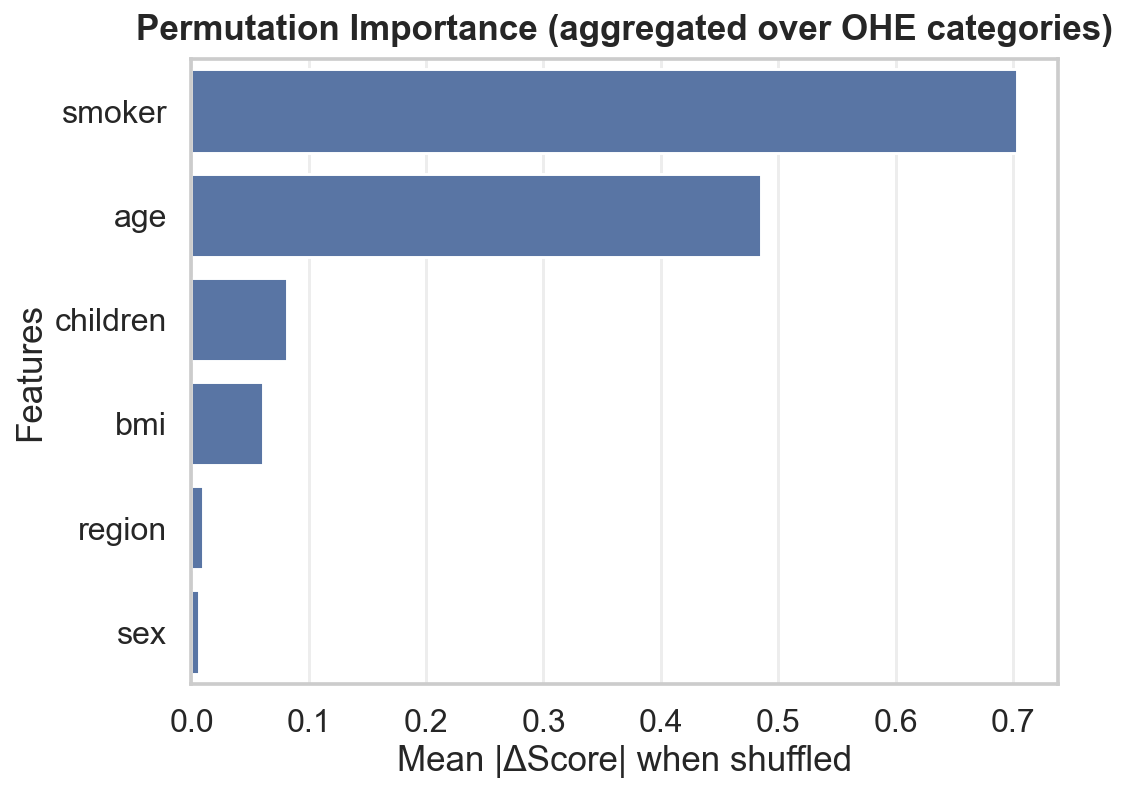

In [ ]:
from sklearn.inspection import permutation_importance
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

pre   = best_model.named_steps["pre"]
model = best_model.named_steps["model"]

# Transform X_test to OHE matrix
X_test_trans = pre.transform(X_test)

# Get OHE feature names
feat_names = pre.get_feature_names_out()

# Run permutation on the final model w.r.t. transformed features
perm = permutation_importance(
    model,
    X_test_trans, y_test,
    scoring="neg_root_mean_squared_error",
    n_repeats=10,
    random_state=42,
    n_jobs=-1,
)

perm_mean = pd.Series(perm.importances_mean, index=feat_names)

# aggregate OHE columns back to their base feature
def base_feature(col):
    parts = col.split("__")
    last = parts[-1]
    return last.split("_", 1)[0] if "_" in last else last

base_groups = np.array([base_feature(c) for c in feat_names])
perm_group = (perm_mean.abs()
              .groupby(base_groups).sum()
              .sort_values(ascending=False))

# Plot aggregated top drivers
top = perm_group.head(10).sort_values(ascending=False)
plt.figure(figsize=(8,6))
sns.barplot(x=top.values, y=top.index)
plt.title("Permutation Importance (aggregated over OHE categories)")
plt.xlabel("Mean |ΔScore| when shuffled")
plt.ylabel("Features")
plt.tight_layout(); plt.show()


## Sensitivity Analysis

In [ ]:
# ================================
# Sensitivity using existing best model
# ================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def model_predict_dollars(best_model, S, X_df):
    """Predict with fitted log-model and back-transform to dollars via Duan smearing."""
    y_log = best_model.predict(X_df)
    return S * np.exp(y_log)

def sensitivity_analysis_best_model(
    X_df: pd.DataFrame,
    best_model, S: float,
    num_cols, cat_cols,
    numeric_delta="1sigma"  # e.g., "1sigma", "0.5sigma", or a float like 1.0 (absolute units)
):
    """
    Compute % change in predicted charges for simple perturbations using the
    ALREADY-FITTED best RF pipeline. No CV, no refits.

    - Numeric: +k·σ (dataset std) if numeric_delta ends with 'sigma', else +numeric_delta units.
    - Categorical: baseline = mode, compare baseline -> each other level.
    """
    X_df = X_df.copy()
    y_base = model_predict_dollars(best_model, S, X_df)
    rows = []  # (feature, change, pct_effect)

    # Helper: predict dollars from log-outputs using fixed smearing S
    def predict_dollars(model, X):
        y_log = model.predict(X)
        return S * np.exp(y_log)

    # ---------- Numeric features: +delta ----------
    for col in num_cols:
        if isinstance(numeric_delta, str) and numeric_delta.lower().endswith("sigma"):
            k = float(numeric_delta.replace("sigma", "").strip() or 1.0)  # "1sigma" -> 1.0
            delta = k * float(X_df[col].std(ddof=0))
        else:
            # Treat as absolute units if a number is passed
            delta = float(numeric_delta)

        if delta == 0 or np.isnan(delta):
            continue

        X_mod = X_df.copy()
        X_mod[col] = X_mod[col] + delta

        y_mod = predict_dollars(best_model, X_mod)
        pct_change = (y_mod - y_base) / (y_base + 1e-12) * 100.0

        for val in pct_change:
            rows.append((col, f"{col}: +{delta:.3g} ({numeric_delta})", float(val)))

    # ----- Categorical features -----
    for col in cat_cols:
        vals = X_df[col].astype(str)
        uniq = vals.dropna().unique().tolist()
        if len(uniq) < 2:
            continue

        base = vals.mode().iloc[0]
        X_base = X_df.copy(); X_base[col] = base
        y_base_cat = model_predict_dollars(best_model, S, X_base)

        for alt in uniq:
            if alt == base:
                continue
            X_alt = X_df.copy(); X_alt[col] = alt
            y_alt = model_predict_dollars(best_model, S, X_alt)

            pct_change = (y_alt - y_base_cat) / (y_base_cat + 1e-12) * 100.0
            rows.extend((col, f"{col}: {base}->{alt}", float(v)) for v in pct_change)

    df_eff = pd.DataFrame(rows, columns=["feature", "change", "pct_effect"])
    summary = (
        df_eff.groupby(["feature", "change"])["pct_effect"]
              .agg(median="median",
                   **{"5th percentile": lambda s: np.percentile(s, 5),
                      "95th percentile": lambda s: np.percentile(s, 95)})
              .reset_index()
              .sort_values(["feature", "median"], ascending=[True, False])
    )
    return summary, df_eff

S = S_global  # <- from your earlier block where you computed residuals

# 2) Ensure X is the RAW feature DataFrame with the original columns
#    (if X already is that, this is a no-op)
X = df[num_cols + cat_cols].copy()

# 3) Make sure numeric cols are numeric so std() isn't NaN
for c in num_cols:
    X[c] = pd.to_numeric(X[c], errors="coerce")
    if X[c].isna().all():
        raise ValueError(f"Column {c} has no numeric values.")
    X[c] = X[c].fillna(X[c].median())

# ---------- Run (uses existing objects) ----------
summary_df, df_eff = sensitivity_analysis_best_model(
    X_df=X,
    best_model=best_model,
    S=S,
    num_cols=num_cols,
    cat_cols=cat_cols,
    numeric_delta="1sigma"   # change to "0.5sigma" or e.g. 5.0 units if you prefer
)

summary_df

,feature,change,median,5th percentile,95th percentile
0,age,age: +14 (1sigma),40.609123,0.000000,130.813675
1,bmi,bmi: +6.1 (1sigma),0.000000,-2.608578,64.886591
2,children,children: +1.21 (1sigma),3.926351,0.000000,26.630317
3,region,region: southeast->northeast,2.278439,-0.518693,17.186652
4,region,region: southeast->northwest,1.102569,0.000000,3.612734
5,region,region: southeast->southwest,-2.766522,-2.766536,-1.500907
6,sex,sex: male->female,2.896063,0.518706,12.264530
7,smoker,smoker: no->yes,282.845947,94.270737,1377.440356


<>:15: SyntaxWarning: invalid escape sequence '\m'
<>:15: SyntaxWarning: invalid escape sequence '\m'
/var/folders/nh/r108gvkd3sz7mwcnj2bcx7vr0000gn/T/ipykernel_60138/4261519740.py:15: SyntaxWarning: invalid escape sequence '\m'
  ax.set_yticklabels([f'$\mathbf{{{f}}}$  | {c}' for f, c in zip(dfp["feature"], dfp["change"])])


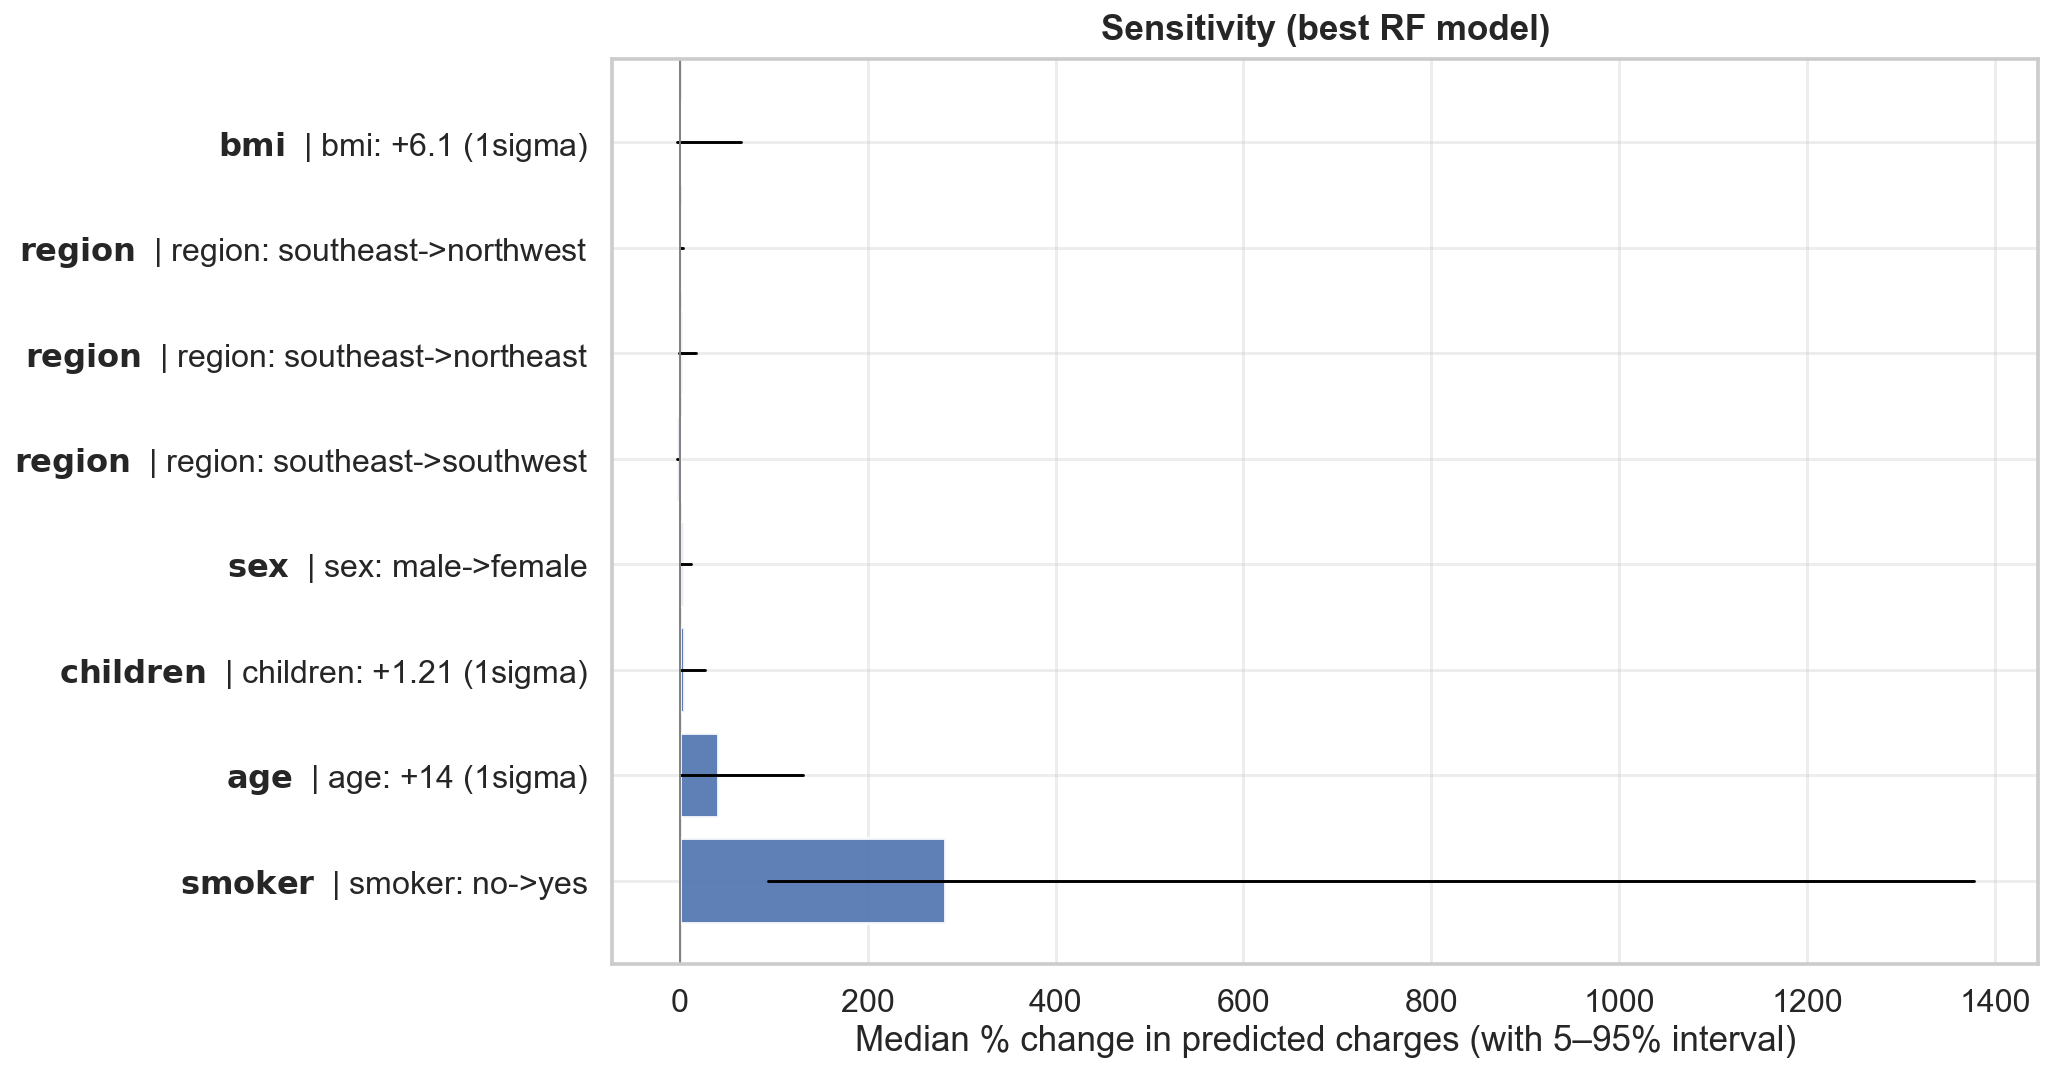

In [ ]:
# ---------- Optional quick plot ----------
def plot_sensitivity(summary_df, top_n=12):
    dfp = summary_df.copy()
    # pick the largest |median| per feature-change; or keep all rows if you prefer
    dfp = dfp.reindex(dfp["median"].abs().sort_values(ascending=False).index).head(top_n)

    fig, ax = plt.subplots(figsize=(15,8))
    y_pos = np.arange(len(dfp))
    ax.barh(y_pos, dfp["median"], alpha=0.9)
    # error bars from 5th to 95th
    for i, (_, row) in enumerate(dfp.iterrows()):
        ax.plot([row["5th percentile"], row["95th percentile"]], [i, i], lw=1.5, color="black")
    ax.axvline(0, lw=1, color="gray")
    ax.set_yticks(y_pos)
    ax.set_yticklabels([f'$\mathbf{{{f}}}$  | {c}' for f, c in zip(dfp["feature"], dfp["change"])])
    ax.set_xlabel("Median % change in predicted charges (with 5–95% interval)")
    ax.set_ylabel("")
    ax.set_title("Sensitivity (best RF model)")
    plt.tight_layout()
    plt.show()

plot_sensitivity(summary_df, top_n=12)

In [ ]:
# ---- Build a "sens_table" comparable to your earlier output ----
# For numerics we only have one change label; for categoricals there are multiple.
# We'll take absolute median effect per (feature, change) and pick the max per feature as 'headline'.
headline = (
    summary_df.assign(abs_median=lambda d: d["median"].abs())
              .sort_values(["feature", "abs_median"], ascending=[True, False])
              .groupby("feature")
              .head(1)
              .reset_index(drop=True)
)

sens_table = headline[["feature", "change", "median", "5th percentile", "95th percentile"]].copy()
sens_table = sens_table.sort_values("median", ascending=False).reset_index(drop=True)

print("\n=== Headline per-feature effect (largest |median| change) ===")
sens_table


=== Headline per-feature effect (largest |median| change) ===


,feature,change,median,5th percentile,95th percentile
0,smoker,smoker: no->yes,282.845947,94.270737,1377.440356
1,age,age: +14 (1sigma),40.609123,0.000000,130.813675
2,children,children: +1.21 (1sigma),3.926351,0.000000,26.630317
3,sex,sex: male->female,2.896063,0.518706,12.264530
4,bmi,bmi: +6.1 (1sigma),0.000000,-2.608578,64.886591
5,region,region: southeast->southwest,-2.766522,-2.766536,-1.500907


In [ ]:
# ---- Aggregated view akin to your agg_df (mean |effect| per base variable) ----
agg_df = (
    summary_df.assign(abs_median=lambda d: d["median"].abs())
              .groupby("feature", as_index=False)["abs_median"]
              .mean()
              .rename(columns={"abs_median": "mean_|median_%_change|"})
              .sort_values("mean_|median_%_change|", ascending=False)
              .reset_index(drop=True)
)

print("\n=== Aggregated mean absolute median % change by feature ===")
agg_df


=== Aggregated mean absolute median % change by feature ===


,feature,mean_|median_%_change|
0,smoker,282.845947
1,age,40.609123
2,children,3.926351
3,sex,2.896063
4,region,2.049177
5,bmi,0.000000


In [ ]:
# ================================
# Sensitivity (best XGB model) — FULL DROP-IN
# ================================
import numpy as np
import pandas as pd

# ---------- Functions (unchanged logic) ----------
def model_predict_dollars(best_model, S, X_df):
    """Predict with fitted log-model and back-transform to dollars via Duan smearing."""
    y_log = best_model.predict(X_df)
    return S * np.exp(y_log)

def sensitivity_with_approx_pct_0p1(
    X_df: pd.DataFrame,
    best_model,
    S: float,
    num_cols, cat_cols,
    numeric_delta="0.1sigma"   # keep as "0.1sigma" to map to the requested column name
):
    """
    Uses the already-fitted model pipeline (best_model) and Duan smearing S.
    - Numeric: +k·σ (dataset std) if numeric_delta ends with 'sigma'; else add absolute units.
    - Categorical: baseline = mode, compare baseline -> each other level.

    Returns:
      summary_df  : per (feature, change) median/p5/p95 % changes
      df_eff      : row-wise % changes (all observations, all changes)
      sens_table  : with 'approx_%_dollar_change_per_0.1'
      agg_df      : grouped by base feature, mean absolute of that column
    """
    X_df = X_df.copy()
    y_base = model_predict_dollars(best_model, S, X_df)

    rows = []  # (feature, change, pct_effect)

    # ----- Numeric features -----
    for col in num_cols:
        if isinstance(numeric_delta, str) and numeric_delta.lower().endswith("sigma"):
            k = numeric_delta.lower().replace("sigma", "").strip()
            k = float(k) if k != "" else 1.0
            delta = k * float(pd.to_numeric(X_df[col], errors="coerce").std(ddof=0))
            delta_label = f"{col}: +{delta:.3g} ({numeric_delta})"
        else:
            delta = float(numeric_delta)
            delta_label = f"{col}: +{delta:.3g}"

        if not np.isfinite(delta) or delta == 0:
            continue

        X_mod = X_df.copy()
        X_mod[col] = pd.to_numeric(X_mod[col], errors="coerce") + delta

        y_mod = model_predict_dollars(best_model, S, X_mod)
        pct_change = (y_mod - y_base) / (y_base + 1e-12) * 100.0

        rows.extend((col, delta_label, float(v)) for v in pct_change)

    # ----- Categorical features -----
    for col in cat_cols:
        vals = X_df[col].astype(str)
        uniq = vals.dropna().unique().tolist()
        if len(uniq) < 2:
            continue

        base = vals.mode().iloc[0]
        X_base = X_df.copy(); X_base[col] = base
        y_base_cat = model_predict_dollars(best_model, S, X_base)

        for alt in uniq:
            if alt == base:
                continue
            X_alt = X_df.copy(); X_alt[col] = alt
            y_alt = model_predict_dollars(best_model, S, X_alt)

            pct_change = (y_alt - y_base_cat) / (y_base_cat + 1e-12) * 100.0
            rows.extend((col, f"{col}: {base}->{alt}", float(v)) for v in pct_change)

    # ---- Assemble and summarize ----
    df_eff = pd.DataFrame(rows, columns=["feature", "change", "pct_effect"])

    summary_df = (
        df_eff.groupby(["feature", "change"])["pct_effect"]
              .agg(median="median",
                   **{"5th percentile": lambda s: np.percentile(s, 5),
                      "95th percentile": lambda s: np.percentile(s, 95)})
              .reset_index()
              .sort_values(["feature", "median"], ascending=[True, False])
    )

    # ---- Sensitivity table (compatible naming) ----
    sens_table = summary_df.rename(
        columns={"median": "approx_%_dollar_change_per_0.1"}
    )[["feature", "change", "approx_%_dollar_change_per_0.1", "5th percentile", "95th percentile"]]

    # ---- Aggregate by base feature (mean absolute impact) ----
    agg_df = (
        sens_table.assign(abs_val=lambda d: d["approx_%_dollar_change_per_0.1"].abs())
                  .groupby("feature", as_index=False)["abs_val"]
                  .mean()
                  .rename(columns={"feature": "base_feature",
                                   "abs_val": "mean_abs_approx_%_dollar_change_per_0.1"})
                  .sort_values("mean_abs_approx_%_dollar_change_per_0.1", ascending=False)
                  .reset_index(drop=True)
    )

    return summary_df, df_eff, sens_table, agg_df


# ---------- Glue for missing names (no logic change, just wiring) ----------
# S: use your smearing factor if available
try:
    S  # already defined?
except NameError:
    try:
        S = S_global  # from your XGB block (Duan smearing from TRAIN residuals)
    except NameError:
        S = 1.0       # fallback if not using smearing

# Feature lists
try:
    num_cols
except NameError:
    num_cols = ["age", "bmi", "children"]

try:
    cat_cols
except NameError:
    cat_cols = ["sex", "smoker", "region"]

# Best fitted pipeline
try:
    best_model  # already defined?
except NameError:
    try:
        best_model = opt.best_estimator_
    except NameError:
        raise NameError("best_model is not defined. Fit BayesSearchCV and set best_model = opt.best_estimator_ first.")

# X: raw feature DataFrame (prefer test set; fallback to full df)
try:
    X  # already defined?
except NameError:
    try:
        X = X_test.copy()
    except NameError:
        X = df[num_cols + cat_cols].copy()

# Ensure numeric cols are numeric so std() is valid
for c in num_cols:
    X[c] = pd.to_numeric(X[c], errors="coerce")
    if X[c].isna().all():
        raise ValueError(f"Numeric column '{c}' is entirely NaN/non-numeric in X.")
    X[c] = X[c].fillna(X[c].median())

# ---------- Run ----------
summary_df, df_eff, sens_table, agg_df = sensitivity_with_approx_pct_0p1(
    X_df=X,
    best_model=best_model,
    S=S,
    num_cols=num_cols,
    cat_cols=cat_cols,
    numeric_delta="0.1sigma"   # keeps the column name accurate
)

# Peek results
print("=== Sensitivity summary (top 12) ===")
print(summary_df.head(12).to_string(index=False))

print("\n=== Sensitivity table (head) ===")
print(sens_table.head(12).to_string(index=False))

print("\n=== Aggregated by base feature (mean |impact|) ===")
print(agg_df.to_string(index=False))


=== Sensitivity summary (top 12) ===
 feature                       change     median  5th percentile  95th percentile
     age         age: +1.4 (0.1sigma)   0.000000        0.000000        15.515733
     bmi        bmi: +0.61 (0.1sigma)   0.000000        0.000000         2.011029
children  children: +0.121 (0.1sigma)   0.000000        0.000000         0.000000
  region region: southeast->northeast   2.278439       -0.518693        17.186652
  region region: southeast->northwest   1.102569        0.000000         3.612734
  region region: southeast->southwest  -2.766522       -2.766536        -1.500907
     sex            sex: male->female   2.896063        0.518706        12.264530
  smoker              smoker: no->yes 282.845947       94.270737      1377.440356

=== Sensitivity table (head) ===
 feature                       change  approx_%_dollar_change_per_0.1  5th percentile  95th percentile
     age         age: +1.4 (0.1sigma)                        0.000000        0.000000   

In [ ]:
sens_table.head(12)

,feature,change,approx_%_dollar_change_per_0.1,5th percentile,95th percentile
0,age,age: +1.4 (0.1sigma),0.000000,0.000000,15.515733
1,bmi,bmi: +0.61 (0.1sigma),0.000000,0.000000,2.011029
2,children,children: +0.121 (0.1sigma),0.000000,0.000000,0.000000
3,region,region: southeast->northeast,2.278439,-0.518693,17.186652
4,region,region: southeast->northwest,1.102569,0.000000,3.612734
5,region,region: southeast->southwest,-2.766522,-2.766536,-1.500907
6,sex,sex: male->female,2.896063,0.518706,12.264530
7,smoker,smoker: no->yes,282.845947,94.270737,1377.440356


In [ ]:
agg_df

,base_feature,mean_abs_approx_%_dollar_change_per_0.1
0,smoker,282.845947
1,sex,2.896063
2,region,2.049177
3,age,0.000000
4,bmi,0.000000
5,children,0.000000


### Fairness Analysis 

In [ ]:
import numpy as np, pandas as pd
from IPython.display import display, HTML

# ---------- helpers (no sklearn needed) ----------
def _calibration_slope(y_true, y_pred):
    y_true = np.asarray(y_true, dtype=float)
    y_pred = np.asarray(y_pred, dtype=float)
    if len(y_true) < 2:
        return np.nan
    v = np.var(y_pred, ddof=1)
    if v == 0:
        return np.nan
    c = np.cov(y_pred, y_true, ddof=1)[0, 1]  
    return float(c / v)                        

def _slice_summary(df, y_col, yhat_col, groupby_cols, mae_parity_threshold=1.25):
    if isinstance(groupby_cols, (tuple, list)):
        label = " × ".join(groupby_cols)
        groupby_cols = list(groupby_cols)
    else:
        label = str(groupby_cols)
        groupby_cols = [groupby_cols]

    maes, biases = [], []
    for _, g in df.groupby(groupby_cols, dropna=False):
        y, yhat = g[y_col].to_numpy(), g[yhat_col].to_numpy()
        maes.append(float(np.mean(np.abs(y - yhat))))
        biases.append(float(np.mean(y - yhat)))  # +ve => underprediction
    if not maes:
        return {"Group": label, "Worst MAE / Best MAE":"—","Ratio":np.nan,
                "Bias Range":"—","Calibration Slope":np.nan,"Pass (≤1.25×)":"N/A"}

    worst, best = max(maes), min(maes)
    ratio = (worst / best) if best > 0 else np.inf
    slope = _calibration_slope(df[y_col], df[yhat_col])
    return {
        "Group": label,
        "Worst MAE / Best MAE": f"{worst:.3f} / {best:.3f}",
        "Ratio": round(ratio, 3) if np.isfinite(ratio) else np.inf,
        "Bias Range": f"[{min(biases):.3f}, {max(biases):.3f}]",
        "Calibration Slope": round(slope, 3) if pd.notna(slope) else np.nan,
        "Pass (≤1.25×)": "PASS" if ratio <= 1.25 else "FAIL",
    }

def _build_fairness_table(df, y_col, yhat_col, groupings):
    rows = [_slice_summary(df, y_col, yhat_col, g) for g in groupings]
    return pd.DataFrame(rows, columns=[
        "Group","Worst MAE / Best MAE","Ratio","Bias Range","Calibration Slope","Pass (≤1.25×)"
    ])

def _style_table(df, title):
    def color_pass(row):
        return [
            ("background-color: #e9f7ef; color: #1e7d32;" if row["Pass (≤1.25×)"]=="PASS"
             else "background-color: #fdecea; color: #b71c1c;") if c=="Pass (≤1.25×)" else ""
            for c in df.columns
        ]
    display(HTML(f"<h3 style='margin-top:18px'>{title}</h3>"))
    display(
        df.style.apply(color_pass, axis=1)
          .set_properties(**{"text-align":"left","background-color":"transparent","border":"1px solid #dfe3e6"})
          .set_table_styles([{"selector":"th","props":[("background-color","#1e3a5f"),("color","white"),("text-align","left")]}])
          .hide(axis="index")
    )

def _standardize_group_cols(df):
    """rename common variants to sex/region/children if needed"""
    rename_map = {}
    if "sex" not in df.columns:
        for c in ("Sex","gender","Gender","SEX"): 
            if c in df.columns: rename_map[c] = "sex"; break
    if "region" not in df.columns:
        for c in ("Region","REGION","region_code","region_cat"):
            if c in df.columns: rename_map[c] = "region"; break
    if "children" not in df.columns:
        for c in ("Children","num_children","child","kids"):
            if c in df.columns: rename_map[c] = "children"; break
    if rename_map:
        df = df.rename(columns=rename_map)
    return df

def _choose_groupings(df):
    avail = [c for c in ["sex","region","children"] if c in df.columns]
    inter = [("sex","children")] if all(c in df.columns for c in ["sex","children"]) else []
    return tuple(avail + inter)

# ---------- XGBoost table ----------
try:
    df_xgb = _standardize_group_cols(X_test.copy())
    df_xgb["y_true"] = np.asarray(y_test_orig).ravel()
    df_xgb["y_xgb"]  = np.asarray(y_pred_test_orig).ravel()
    xgb_groups = _choose_groupings(df_xgb)
    xgb_fair = _build_fairness_table(df_xgb, y_col="y_true", yhat_col="y_xgb", groupings=xgb_groups)
    _style_table(xgb_fair, "Fairness Analysis for XGBoost Model")
except NameError as e:
    print("Skip XGBoost fairness (missing variable):", e)

# ---------- Random Forest table ----------
try:
    df_rf = _standardize_group_cols(X_test.copy())
    df_rf["y_true"] = np.asarray(y_raw_test).ravel()
    df_rf["y_rf"]   = np.asarray(y_pred).ravel()   
    rf_groups = _choose_groupings(df_rf)
    rf_fair = _build_fairness_table(df_rf, y_col="y_true", yhat_col="y_rf", groupings=rf_groups)
    _style_table(rf_fair, "Fairness Analysis for Random Forest Model")
except NameError as e:
    print("Skip Random Forest fairness (missing variable):", e)


Group,Worst MAE / Best MAE,Ratio,Bias Range,Calibration Slope,Pass (≤1.25×)
sex,2834.990 / 2583.035,1.098000,"[-758.259, -477.153]",0.954000,PASS
region,3401.914 / 2123.751,1.602000,"[-1053.180, 190.935]",0.954000,FAIL
children,3189.049 / 809.245,3.941000,"[-1232.926, -301.309]",0.954000,FAIL
sex × children,3264.763 / 394.261,8.281000,"[-1719.582, -57.686]",0.954000,FAIL


Skip Random Forest fairness (missing variable): name 'y_pred' is not defined


In [ ]:
# Group-wise Duan Smearing by REGION + Fairness (RF & XGB)
# - No sex×children interaction used anywhere
# - Uses TRAIN residuals only; falls back to global S for unseen regions

import numpy as np, pandas as pd
from IPython.display import display, HTML
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

# ----------  Ensure column naming is consistent ----------
def _standardize_region_cols(df):
    rename = {}
    if "region" not in df.columns:
        for c in ("Region","REGION","region_code","region_cat"):
            if c in df.columns: rename[c] = "region"; break
    if "sex" not in df.columns:
        for c in ("Sex","SEX","gender","Gender"):
            if c in df.columns: rename[c] = "sex"; break
    if "children" not in df.columns:
        for c in ("Children","num_children","child","kids"):
            if c in df.columns: rename[c] = "children"; break
    return df.rename(columns=rename) if rename else df

# ---------- 1) Per-group (REGION) Duan smearing ----------
def duan_smear_by_region(X_tr, y_log_tr, yhat_log_tr, X_te, yhat_log_te, region_col="region"):
    """
    Back-transform log predictions using Duan smearing computed PER REGION on TRAIN.
    Falls back to global S if a region in test wasn't seen in train.
    """
    X_tr = _standardize_region_cols(X_tr.copy())
    X_te = _standardize_region_cols(X_te.copy())
    if region_col not in X_tr.columns or region_col not in X_te.columns:
        raise ValueError(f"'{region_col}' column not found in X_train/X_test after standardization.")

    resid_log = (np.asarray(y_log_tr).ravel() - np.asarray(yhat_log_tr).ravel())
    S_global = float(np.mean(np.exp(resid_log)))

    tr = X_tr.copy()
    tr["_resid_log"] = resid_log
    S_map = tr.groupby(region_col, dropna=False)["_resid_log"].apply(
        lambda r: float(np.mean(np.exp(r)))
    ).to_dict()

    te = X_te.copy()
    te["_yhat_log"] = np.asarray(yhat_log_te).ravel()

    def smear_row(row):
        Sg = S_map.get(row[region_col], S_global)
        return Sg * np.exp(row["_yhat_log"])

    return te.apply(smear_row, axis=1).to_numpy()

# ----------  Build group-smeared predictions for BOTH models ----------
# RANDOM FOREST
try:
    if "y_pred_train_hat" not in globals():
        y_pred_train_hat = best_rf_pipe.predict(X_train)
    if "y_pred_test_hat" not in globals():
        y_pred_test_hat = best_rf_pipe.predict(X_test)
    y_pred_rf_region = duan_smear_by_region(
        X_train, y_train, y_pred_train_hat,
        X_test,  y_pred_test_hat,
        region_col="region"
    )
    y_true_rf = np.asarray(y_raw_test).ravel()
    y_pred_rf_groupS = np.asarray(y_pred_rf_region).ravel()
except Exception as e:
    y_pred_rf_groupS = None
    print("RF group-smearing skipped:", e)

# XGBOOST
try:
    if "y_pred_train" not in globals():
        y_pred_train = best_model.predict(X_train)
    if "y_pred_test" not in globals():
        y_pred_test = best_model.predict(X_test)

    y_pred_xgb_region = duan_smear_by_region(
        X_train, y_train, y_pred_train,
        X_test,  y_pred_test,
        region_col="region"
    )
    y_true_xgb = np.asarray(y_test_orig).ravel()
    y_pred_xgb_groupS = np.asarray(y_pred_xgb_region).ravel()
except Exception as e:
    y_pred_xgb_groupS = None
    print("XGB group-smearing skipped:", e)

# ----------  Fairness table utilities (no sex×children interaction) ----------
def _calibration_slope(y_true, y_pred):
    y_true = np.asarray(y_true, dtype=float)
    y_pred = np.asarray(y_pred, dtype=float)
    if len(y_true) < 2: return np.nan
    v = np.var(y_pred, ddof=1)
    if v == 0: return np.nan
    c = np.cov(y_pred, y_true, ddof=1)[0, 1]
    return float(c / v)

def _slice_summary(df, y_col, yhat_col, groupby_col, mae_parity_threshold=1.25):
    label = str(groupby_col)
    maes, biases = [], []
    for _, g in df.groupby([groupby_col], dropna=False):
        y, yhat = g[y_col].to_numpy(), g[yhat_col].to_numpy()
        maes.append(float(np.mean(np.abs(y - yhat))))
        biases.append(float(np.mean(y - yhat)))
    if not maes:
        return {"Group": label, "Worst MAE / Best MAE":"—","Ratio":np.nan,
                "Bias Range":"—","Calibration Slope":np.nan,"Pass (≤1.25×)":"N/A"}
    worst, best = max(maes), min(maes)
    ratio = (worst / best) if best > 0 else np.inf
    slope = _calibration_slope(df[y_col], df[yhat_col])
    return {
        "Group": label,
        "Worst MAE / Best MAE": f"{worst:.3f} / {best:.3f}",
        "Ratio": round(ratio, 3) if np.isfinite(ratio) else np.inf,
        "Bias Range": f"[{min(biases):.3f}, {max(biases):.3f}]",
        "Calibration Slope": round(slope, 3) if pd.notna(slope) else np.nan,
        "Pass (≤1.25×)": "PASS" if ratio <= 1.25 else "FAIL",
    }

def _build_fairness_table(df, y_col, yhat_col, groupings=("sex","region","children")):
    # keep only those columns that actually exist; no interaction term added
    groupings = [g for g in groupings if g in df.columns]
    rows = [_slice_summary(df, y_col, yhat_col, g) for g in groupings]
    return pd.DataFrame(rows, columns=[
        "Group","Worst MAE / Best MAE","Ratio","Bias Range","Calibration Slope","Pass (≤1.25×)"
    ])

def _style_table(df, title):
    def color_pass(row):
        return [
            ("background-color:transparent;color:#1e7d32;" if row["Pass (≤1.25×)"]=="PASS"
             else "background-color:#fdecea;color:#b71c1c;") if c=="Pass (≤1.25×)" else ""
            for c in df.columns
        ]
    display(HTML(f"<h3 style='margin-top:18px'>{title}</h3>"))
    display(
        df.style.apply(color_pass, axis=1)
          .set_properties(**{"text-align":"left","background-color":"transparent","border":"1px solid #dfe3e6"})
          .set_table_styles([{"selector":"th","props":[("background-color","#1e3a5f"),("color","white"),("text-align","left")]}])
          .hide(axis="index")
    )

# ---------- Build fairness tables using GROUP-SMEARED predictions ----------
# Random Forest
try:
    df_rf = _standardize_region_cols(X_test.copy())
    df_rf["y_true"] = np.asarray(y_true_rf if "y_true_rf" in globals() else y_raw_test).ravel()
    df_rf["y_rf"]   = y_pred_rf_groupS
    rf_fair = _build_fairness_table(df_rf, "y_true", "y_rf", groupings=("sex","region","children"))
    _style_table(rf_fair, "Fairness Analysis — Random Forest (group-smearing by region)")
except Exception as e:
    print("RF fairness table skipped:", e)

# XGBoost
try:
    df_xgb = _standardize_region_cols(X_test.copy())
    df_xgb["y_true"] = y_true_xgb
    df_xgb["y_xgb"]  = y_pred_xgb_groupS
    xgb_fair = _build_fairness_table(df_xgb, "y_true", "y_xgb", groupings=("sex","region","children"))
    _style_table(xgb_fair, "Fairness Analysis — XGBoost (group-smearing by region)")
except Exception as e:
    print("XGB fairness table skipped:", e)

# ---------- Overall metrics after group-smearing ----------
rows = []
if 'y_pred_rf_groupS' in globals() and y_pred_rf_groupS is not None:
    rows.append({
        "Model":"RF (Group-S)", 
        "RMSE":np.sqrt(mean_squared_error(df_rf["y_true"], df_rf["y_rf"])),
        "MAE":mean_absolute_error(df_rf["y_true"], df_rf["y_rf"]),
        "MAPE":mean_absolute_percentage_error(df_rf["y_true"], df_rf["y_rf"])*100,
        "R2":r2_score(df_rf["y_true"], df_rf["y_rf"])
    })
if 'y_pred_xgb_groupS' in globals() and y_pred_xgb_groupS is not None:
    rows.append({
        "Model":"XGB (Group-S)", 
        "RMSE":np.sqrt(mean_squared_error(df_xgb["y_true"], df_xgb["y_xgb"])),
        "MAE":mean_absolute_error(df_xgb["y_true"], df_xgb["y_xgb"]),
        "MAPE":mean_absolute_percentage_error(df_xgb["y_true"], df_xgb["y_xgb"])*100,
        "R2":r2_score(df_xgb["y_true"], df_xgb["y_xgb"])
    })
if rows:
    met = pd.DataFrame(rows)
    met["RMSE"]=met["RMSE"].round(2); met["MAE"]=met["MAE"].round(2); met["MAPE"]=met["MAPE"].round(2); met["R2"]=met["R2"].round(4)
    display(HTML("<h4>Global metrics after group-smearing (by region)</h4>"))
    display(met)


Group,Worst MAE / Best MAE,Ratio,Bias Range,Calibration Slope,Pass (≤1.25×)
sex,2875.322 / 2631.894,1.092000,"[-783.243, -499.319]",0.951000,PASS
region,3715.384 / 1783.803,2.083000,"[-1002.992, -230.017]",0.951000,FAIL
children,3232.298 / 628.989,5.139000,"[-1093.150, -256.426]",0.951000,FAIL


Group,Worst MAE / Best MAE,Ratio,Bias Range,Calibration Slope,Pass (≤1.25×)
sex,2751.725 / 2705.702,1.017000,"[-520.200, -256.595]",1.013000,PASS
region,3613.121 / 1921.363,1.880000,"[-651.960, -162.247]",1.013000,FAIL
children,3324.398 / 1204.416,2.760000,"[-2759.255, -37.824]",1.013000,FAIL


,Model,RMSE,MAE,MAPE,R2
0,RF (Group-S),4319.94,2745.43,23.99,0.8984
1,XGB (Group-S),4361.31,2730.26,25.15,0.8965


In [ ]:
# Group-wise Duan Smearing by CHILDREN (binned 0/1/2/3+) + Fairness
import numpy as np, pandas as pd
from IPython.display import display, HTML
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

# --- bin children in train & test (stabilizes small groups like 5) ---
X_train = X_train.copy(); X_test = X_test.copy()
X_train["children_bin"] = np.minimum(X_train["children"], 3)
X_test["children_bin"]  = np.minimum(X_test["children"], 3)

def duan_smear_by_col(X_tr, y_log_tr, yhat_log_tr, X_te, yhat_log_te, col):
    resid_log = (np.asarray(y_log_tr).ravel() - np.asarray(yhat_log_tr).ravel())
    S_global = float(np.mean(np.exp(resid_log)))
    tr = X_tr.copy(); tr["_resid_log"] = resid_log
    S_map = tr.groupby(col, dropna=False)["_resid_log"].apply(lambda r: float(np.mean(np.exp(r)))).to_dict()
    te = X_te.copy(); te["_yhat_log"] = np.asarray(yhat_log_te).ravel()
    def smear_row(row):
        return S_map.get(row[col], S_global) * np.exp(row["_yhat_log"])
    return te.apply(smear_row, axis=1).to_numpy()

# ---------- RF: children-wise smearing ----------
if "y_pred_train_hat" not in globals(): y_pred_train_hat = best_rf_pipe.predict(X_train)
if "y_pred_test_hat"  not in globals(): y_pred_test_hat  = best_rf_pipe.predict(X_test)
y_pred_rf_child = duan_smear_by_col(X_train, y_train, y_pred_train_hat, X_test, y_pred_test_hat, "children_bin")

# ---------- XGB: children-wise smearing ----------
# reuse your best_model pipeline to get log preds if not already computed
if "y_pred_train" not in globals(): y_pred_train = best_model.predict(X_train)
if "y_pred_test"  not in globals(): y_pred_test  = best_model.predict(X_test)
y_pred_xgb_child = duan_smear_by_col(X_train, y_train, y_pred_train, X_test, y_pred_test, "children_bin")

# ---------- fairness helpers ----------
def _calibration_slope(y_true, y_pred):
    y_true = np.asarray(y_true, dtype=float); y_pred = np.asarray(y_pred, dtype=float)
    if len(y_true) < 2: return np.nan
    v = np.var(y_pred, ddof=1);  c = np.cov(y_pred, y_true, ddof=1)[0,1]
    return np.nan if v == 0 else float(c / v)

def _slice_summary(df, y_col, yhat_col, group_col, thr=1.25):
    maes, biases = [], []
    for _, g in df.groupby([group_col], dropna=False):
        y, yhat = g[y_col].to_numpy(), g[yhat_col].to_numpy()
        maes.append(float(np.mean(np.abs(y - yhat))))
        biases.append(float(np.mean(y - yhat)))
    worst, best = max(maes), min(maes)
    ratio = (worst / best) if best > 0 else np.inf
    slope = _calibration_slope(df[y_col], df[yhat_col])
    return {
        "Group": group_col,
        "Worst MAE / Best MAE": f"{worst:.3f} / {best:.3f}",
        "Ratio": round(ratio, 3), "Bias Range": f"[{min(biases):.3f}, {max(biases):.3f}]",
        "Calibration Slope": round(slope, 3) if pd.notna(slope) else np.nan,
        "Pass (≤1.25×)": "PASS" if ratio <= thr else "FAIL",
    }

def _build_fairness(df, y_col, yhat_col):
    cols = [c for c in ["sex","region","children_bin"] if c in df.columns]
    return pd.DataFrame([_slice_summary(df, y_col, yhat_col, c) for c in cols],
                        columns=["Group","Worst MAE / Best MAE","Ratio","Bias Range","Calibration Slope","Pass (≤1.25×)"])

def _style_table(df, title):
    def color_pass(row):
        return [("background-color:#e9f7ef;color:#1e7d32;" if row["Pass (≤1.25×)"]=="PASS"
                 else "background-color:#fdecea;color:#b71c1c;") if c=="Pass (≤1.25×)" else "" for c in df.columns]
    display(HTML(f"<h3 style='margin-top:18px'>{title}</h3>"))
    display(df.style.apply(color_pass, axis=1)
                 .set_properties(**{"text-align":"left","background-color":"transparent","border":"1px solid #dfe3e6"})
                 .set_table_styles([{"selector":"th","props":[("background-color","#1e3a5f"),("color","white"),("text-align","left")]}])
                 .hide(axis="index"))

# RF
df_rf = X_test.copy()
df_rf["y_true"] = np.asarray(y_raw_test).ravel()
df_rf["y_rf"]   = np.asarray(y_pred_rf_child).ravel()
rf_fair = _build_fairness(df_rf, "y_true", "y_rf")
_style_table(rf_fair, "Fairness — Random Forest (group-smearing by children_bin)")

# XGB
df_xgb = X_test.copy()
df_xgb["y_true"] = np.asarray(y_test_orig).ravel()
df_xgb["y_xgb"]  = np.asarray(y_pred_xgb_child).ravel()
xgb_fair = _build_fairness(df_xgb, "y_true", "y_xgb")
_style_table(xgb_fair, "Fairness — XGBoost (group-smearing by children_bin)")


Group,Worst MAE / Best MAE,Ratio,Bias Range,Calibration Slope,Pass (≤1.25×)
sex,2844.076 / 2576.351,1.104000,"[-769.167, -463.767]",0.954000,PASS
region,3405.594 / 2139.297,1.592000,"[-1080.971, 190.049]",0.954000,FAIL
children_bin,3391.334 / 1968.122,1.723000,"[-850.926, -436.173]",0.954000,FAIL


Group,Worst MAE / Best MAE,Ratio,Bias Range,Calibration Slope,Pass (≤1.25×)
sex,2674.613 / 2643.225,1.012000,"[-436.704, -238.675]",1.020000,PASS
region,3365.981 / 2085.366,1.614000,"[-680.582, 152.556]",1.020000,FAIL
children_bin,3356.075 / 2022.765,1.659000,"[-482.958, -231.090]",1.020000,FAIL


In [ ]:
import numpy as np, pandas as pd
from IPython.display import display, HTML
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

def _std_cols(df):
    m = {}
    if "region" not in df.columns:
        for c in ["Region","REGION","region_code","region_cat"]:
            if c in df.columns: m[c]="region"; break
    if "sex" not in df.columns:
        for c in ["Sex","SEX","gender","Gender"]:
            if c in df.columns: m[c]="sex"; break
    if "children" not in df.columns:
        for c in ["Children","num_children","child","kids"]:
            if c in df.columns: m[c]="children"; break
    out = df.rename(columns=m) if m else df
    return out

X_train_nb = _std_cols(X_train.copy())
X_test_nb  = _std_cols(X_test.copy())
X_train_nb["children_bin"] = np.minimum(X_train_nb["children"], 3)
X_test_nb["children_bin"]  = np.minimum(X_test_nb["children"], 3)

def smear_exact_rc(X_tr, y_log_tr, yhat_log_tr, X_te, yhat_log_te):
    resid_log = (np.asarray(y_log_tr).ravel() - np.asarray(yhat_log_tr).ravel())
    S_global = float(np.mean(np.exp(resid_log)))

    tr = X_tr.copy(); tr["_resid_log"] = resid_log
    key = list(map(tuple, tr[["region","children_bin"]].to_records(index=False)))
    S_raw = tr.groupby(["region","children_bin"], dropna=False)["_resid_log"].apply(lambda r: float(np.mean(np.exp(r))))
    S_map = S_raw.to_dict()

    te = X_te.copy(); te["_yhat_log"] = np.asarray(yhat_log_te).ravel()
    def smear_row(row):
        return S_map.get((row["region"], row["children_bin"]), S_global) * np.exp(row["_yhat_log"])
    return te.apply(smear_row, axis=1).to_numpy()

# ---- RF predictions (log preds already computed in your RF cell) ----
if "y_pred_train_hat" not in globals(): y_pred_train_hat = best_rf_pipe.predict(X_train_nb)
if "y_pred_test_hat"  not in globals(): y_pred_test_hat  = best_rf_pipe.predict(X_test_nb)
y_pred_rf_rc_noback = smear_exact_rc(X_train_nb, y_train, y_pred_train_hat, X_test_nb, y_pred_test_hat)

# ---- XGB predictions (log preds from your best_model pipeline) ----
if "y_pred_train" not in globals(): y_pred_train = best_model.predict(X_train_nb)
if "y_pred_test"  not in globals(): y_pred_test  = best_model.predict(X_test_nb)
y_pred_xgb_rc_noback = smear_exact_rc(X_train_nb, y_train, y_pred_train, X_test_nb, y_pred_test)

def _calib_slope(y, yhat):
    y, yhat = np.asarray(y,float), np.asarray(yhat,float)
    if yhat.size<2: return np.nan
    v = np.var(yhat, ddof=1); 
    return np.nan if v==0 else float(np.cov(yhat,y, ddof=1)[0,1]/v)

def _fair_table(df, y_col, yhat_col):
    rows=[]
    for g in [c for c in ["sex","region","children_bin"] if c in df.columns]:
        maes, biases = [], []
        for _, s in df.groupby(g, dropna=False):
            y, p = s[y_col].to_numpy(), s[yhat_col].to_numpy()
            maes.append(float(np.mean(np.abs(y-p))))
            biases.append(float(np.mean(y-p)))
        worst, best = max(maes), min(maes)
        rows.append({
            "Group": g,
            "Worst MAE / Best MAE": f"{worst:.3f} / {best:.3f}",
            "Ratio": round((worst/best) if best>0 else np.inf, 3),
            "Bias Range": f"[{min(biases):.3f}, {max(biases):.3f}]",
            "Calibration Slope": round(_calib_slope(df[y_col], df[yhat_col]), 3),
            "Pass (≤1.25×)": "PASS" if (worst/best)<=1.25 else "FAIL",
        })
    return pd.DataFrame(rows, columns=["Group","Worst MAE / Best MAE","Ratio","Bias Range","Calibration Slope","Pass (≤1.25×)"])

def _style(df, title):
    def color_pass(r):
        return [("background-color:#e9f7ef;color:#1e7d32;" if r["Pass (≤1.25×)"]=="PASS"
                 else "background-color:#fdecea;color:#b71c1c;") if c=="Pass (≤1.25×)" else "" for c in df.columns]
    display(HTML(f"<h3 style='margin-top:18px'>{title}</h3>"))
    display(df.style.apply(color_pass, axis=1)
                 .set_properties(**{"text-align":"left","background-color":"transparent","border":"1px solid #dfe3e6"})
                 .set_table_styles([{"selector":"th","props":[("background-color","#1e3a5f"),("color","white"),("text-align","left")]}])
                 .hide(axis="index"))

# --- 4) Build tables for both models ---
# RF
df_rf = X_test_nb.copy()
df_rf["y_true"] = np.asarray(y_raw_test).ravel()
df_rf["y_hat"]  = y_pred_rf_rc_noback
_style(_fair_table(df_rf, "y_true", "y_hat"), "Fairness — Random Forest (region×children_bin, NO backoff/shrink)")

# XGB
df_xgb = X_test_nb.copy()
df_xgb["y_true"] = np.asarray(y_test_orig).ravel()
df_xgb["y_hat"]  = y_pred_xgb_rc_noback
_style(_fair_table(df_xgb, "y_true", "y_hat"), "Fairness — XGBoost (region×children_bin, NO backoff/shrink)")


Group,Worst MAE / Best MAE,Ratio,Bias Range,Calibration Slope,Pass (≤1.25×)
sex,2799.981 / 2798.054,1.001000,"[-718.350, -567.098]",0.946000,PASS
region,3753.217 / 1718.738,2.184000,"[-1053.927, -275.573]",0.946000,FAIL
children_bin,3549.464 / 1963.429,1.808000,"[-889.919, -449.419]",0.946000,FAIL


Group,Worst MAE / Best MAE,Ratio,Bias Range,Calibration Slope,Pass (≤1.25×)
sex,2966.378 / 2647.211,1.121000,"[-417.400, -363.061]",1.003000,PASS
region,3694.082 / 1859.651,1.986000,"[-690.678, -102.309]",1.003000,FAIL
children_bin,3882.055 / 1950.529,1.990000,"[-666.670, -125.145]",1.003000,FAIL


In [ ]:
# Group-wise Duan smearing by (a) children_bin and (b) sex

import numpy as np, pandas as pd
from IPython.display import display, HTML
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

def _std_cols(df):
    m = {}
    if "sex" not in df.columns:
        for c in ("Sex","SEX","gender","Gender"): 
            if c in df.columns: m[c]="sex"; break
    if "region" not in df.columns:
        for c in ("Region","REGION","region_code","region_cat"):
            if c in df.columns: m[c]="region"; break
    if "children" not in df.columns:
        for c in ("Children","num_children","child","kids"):
            if c in df.columns: m[c]="children"; break
    return df.rename(columns=m) if m else df

def _duan_smear_by_col(X_tr, y_log_tr, yhat_log_tr, X_te, yhat_log_te, col):
    """Smear per category in `col` using TRAIN residuals only; fallback to global if unseen."""
    resid_log = (np.asarray(y_log_tr).ravel() - np.asarray(yhat_log_tr).ravel())
    S_global = float(np.mean(np.exp(resid_log)))
    tr = X_tr.copy(); tr["_resid_log"] = resid_log
    S_map = tr.groupby(col, dropna=False)["_resid_log"].apply(lambda r: float(np.mean(np.exp(r)))).to_dict()
    te = X_te.copy(); te["_yhat_log"] = np.asarray(yhat_log_te).ravel()
    def smear_row(row):
        return S_map.get(row[col], S_global) * np.exp(row["_yhat_log"])
    return te.apply(smear_row, axis=1).to_numpy()

def _calib_slope(y, yhat):
    y, yhat = np.asarray(y,float), np.asarray(yhat,float)
    if yhat.size < 2: return np.nan
    v = np.var(yhat, ddof=1)
    return np.nan if v == 0 else float(np.cov(yhat, y, ddof=1)[0,1]/v)

def _fair_table(df, y_col, yhat_col, label):
    rows=[]
    for g in [c for c in ["sex","region","children_bin"] if c in df.columns]:
        maes, biases = [], []
        for _, s in df.groupby(g, dropna=False):
            y, p = s[y_col].to_numpy(), s[yhat_col].to_numpy()
            maes.append(float(np.mean(np.abs(y-p))))
            biases.append(float(np.mean(y-p)))
        worst, best = max(maes), min(maes)
        rows.append({
            "Group": g,
            "Worst MAE / Best MAE": f"{worst:.3f} / {best:.3f}",
            "Ratio": round((worst/best) if best>0 else np.inf, 3),
            "Bias Range": f"[{min(biases):.3f}, {max(biases):.3f}]",
            "Calibration Slope": round(_calib_slope(df[y_col], df[yhat_col]), 3),
            "Pass (≤1.25×)": "PASS" if (worst/best)<=1.25 else "FAIL",
        })
    out = pd.DataFrame(rows, columns=["Group","Worst MAE / Best MAE","Ratio","Bias Range","Calibration Slope","Pass (≤1.25×)"])
    def _style(d, title):
        def color_pass(r):
            return [("background-color:#e9f7ef;color:#1e7d32;" if r["Pass (≤1.25×)"]=="PASS"
                     else "background-color:#fdecea;color:#b71c1c;") if c=="Pass (≤1.25×)" else "" for c in d.columns]
        display(HTML(f"<h3 style='margin-top:18px'>{title}</h3>"))
        display(d.style.apply(color_pass, axis=1)
                    .set_properties(**{"text-align":"left","background-color":"transparent","border":"1px solid #dfe3e6"})
                    .set_table_styles([{"selector":"th","props":[("background-color","#1e3a5f"),("color","white"),("text-align","left")]}])
                    .hide(axis="index"))
    _style(out, label)

def _metrics_row(name, y, yhat):
    return dict(Model=name,
                RMSE=np.sqrt(mean_squared_error(y, yhat)),
                MAE=mean_absolute_error(y, yhat),
                MAPE=mean_absolute_percentage_error(y, yhat)*100,
                R2=r2_score(y, yhat))

# --- Prep: standardize cols + create children_bin 0/1/2/3+ ---
X_train_std = _std_cols(X_train.copy())
X_test_std  = _std_cols(X_test.copy())
X_train_std["children_bin"] = np.minimum(X_train_std["children"], 3)
X_test_std["children_bin"]  = np.minimum(X_test_std["children"], 3)

# --- Build group-smeared predictions for BOTH models ----------
rows_metrics = []

# RF needs: y_train (log), y_pred_train_hat (log), y_pred_test_hat (log), y_raw_test ($)
# Children_bin smearing
yhat_rf_child = _duan_smear_by_col(X_train_std, y_train, y_pred_train_hat, X_test_std, y_pred_test_hat, "children_bin")
rows_metrics += [_metrics_row("RF — Group S (children_bin)", np.asarray(y_raw_test), yhat_rf_child)]

# Sex smearing
yhat_rf_sex = _duan_smear_by_col(X_train_std, y_train, y_pred_train_hat, X_test_std, y_pred_test_hat, "sex")
rows_metrics += [_metrics_row("RF — Group S (sex)", np.asarray(y_raw_test), yhat_rf_sex)]

# XGB needs: y_pred_train (log), y_pred_test (log), y_test_orig ($)
if "y_pred_train" not in globals(): y_pred_train = best_model.predict(X_train_std)
if "y_pred_test"  not in globals(): y_pred_test  = best_model.predict(X_test_std)

yhat_xgb_child = _duan_smear_by_col(X_train_std, y_train, y_pred_train, X_test_std, y_pred_test, "children_bin")
rows_metrics += [_metrics_row("XGB — Group S (children_bin)", np.asarray(y_test_orig), yhat_xgb_child)]

yhat_xgb_sex   = _duan_smear_by_col(X_train_std, y_train, y_pred_train, X_test_std, y_pred_test, "sex")
rows_metrics += [_metrics_row("XGB — Group S (sex)", np.asarray(y_test_orig), yhat_xgb_sex)]

# --- Metrics table (so you can pick the winner to deploy) ----
met = pd.DataFrame(rows_metrics)
for c in ["RMSE","MAE","MAPE","R2"]:
    met[c] = met[c].round(2) if c!="R2" else met[c].round(4)
display(HTML("<h4>Global metrics after group-wise smearing</h4>"))
display(met.sort_values("MAE"))

# --- Fairness tables for both choices (RF & XGB) -------------
XT = X_test_std.copy()

# RF fairness


df_rf_sex = XT.copy(); df_rf_sex["y_true"]=np.asarray(y_raw_test); df_rf_sex["y_hat"]=yhat_rf_sex
_fair_table(df_rf_sex, "y_true", "y_hat", "Fairness — RF (smear by sex)")

# XGB fairness


df_xgb_sex = XT.copy(); df_xgb_sex["y_true"]=np.asarray(y_test_orig); df_xgb_sex["y_hat"]=yhat_xgb_sex
_fair_table(df_xgb_sex, "y_true", "y_hat", "Fairness — XGB (smear by sex)")


,Model,RMSE,MAE,MAPE,R2
2,XGB — Group S (children_bin),4308.77,2659.97,24.99,0.8990
3,XGB — Group S (sex),4317.83,2681.76,25.10,0.8985
1,RF — Group S (sex),4283.19,2700.55,24.01,0.9002
0,RF — Group S (children_bin),4287.93,2701.22,23.98,0.8999


Group,Worst MAE / Best MAE,Ratio,Bias Range,Calibration Slope,Pass (≤1.25×)
sex,2834.990 / 2583.035,1.098000,"[-758.259, -477.153]",0.954000,PASS
region,3401.914 / 2123.751,1.602000,"[-1053.180, 190.935]",0.954000,FAIL
children_bin,3189.049 / 2088.219,1.527000,"[-990.045, -301.309]",0.954000,FAIL


Group,Worst MAE / Best MAE,Ratio,Bias Range,Calibration Slope,Pass (≤1.25×)
sex,2712.661 / 2646.420,1.025000,"[-483.599, -234.516]",1.018000,PASS
region,3349.601 / 2145.133,1.561000,"[-686.623, 184.303]",1.018000,FAIL
children_bin,3263.409 / 2323.026,1.405000,"[-1037.770, -57.697]",1.018000,FAIL


In [ ]:
# Group-wise Duan smearing by INTERSECTION: sex × children_bin
# (train-only factors, shrinkage to global, no backoff to sex-only)
# Works for BOTH RF and XGB with your existing variables

import numpy as np, pandas as pd
from IPython.display import display, HTML
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

def _std_cols(df):
    m = {}
    if "sex" not in df.columns:
        for c in ("Sex","SEX","gender","Gender"):
            if c in df.columns: m[c]="sex"; break
    if "region" not in df.columns:
        for c in ("Region","REGION","region_code","region_cat"):
            if c in df.columns: m[c]="region"; break
    if "children" not in df.columns:
        for c in ("Children","num_children","child","kids"):
            if c in df.columns: m[c]="children"; break
    return df.rename(columns=m) if m else df

X_train_sc = _std_cols(X_train.copy())
X_test_sc  = _std_cols(X_test.copy())
# bin children to stabilize small groups (0/1/2/3+)
X_train_sc["children_bin"] = np.minimum(X_train_sc["children"], 3)
X_test_sc["children_bin"]  = np.minimum(X_test_sc["children"], 3)

# ---------- 1) Duan smearing per (sex, children_bin) with shrinkage ----------
def _duan(resid_log):
    return float(np.mean(np.exp(resid_log)))

def smear_by_sex_children(
    X_tr, y_log_tr, yhat_log_tr,
    X_te, yhat_log_te,
    shrink_k=50  # set to 0 to disable shrinkage
):
    """
    Compute S_{sex,children_bin} on TRAIN residuals and apply to TEST.
    - No backoff to sex-only; if a test cell wasn't in train, fallback to global S.
    - Shrinkage toward global: S* = w*S_cell + (1-w)*S_global, w = n/(n+shrink_k)
    """
    tr = X_tr.copy()
    tr["_resid_log"] = np.asarray(y_log_tr).ravel() - np.asarray(yhat_log_tr).ravel()
    te = X_te.copy()
    te["_yhat_log"]  = np.asarray(yhat_log_te).ravel()

    # global factor
    S_global = _duan(tr["_resid_log"])

    # cell factors with shrinkage
    grp = (tr.groupby(["sex","children_bin"], dropna=False)["_resid_log"]
             .agg(count="size", S_raw=lambda r: _duan(r))
             .reset_index())
    if shrink_k and shrink_k > 0:
        w = grp["count"] / (grp["count"] + shrink_k)
        grp["S_star"] = w * grp["S_raw"] + (1 - w) * S_global
    else:
        grp["S_star"] = grp["S_raw"]

    key = list(map(tuple, grp[["sex","children_bin"]].to_records(index=False)))
    S_map = dict(zip(key, grp["S_star"]))

    # apply per-row; fallback to global if unseen cell
    def smear_row(row):
        return S_map.get((row["sex"], row["children_bin"]), S_global) * np.exp(row["_yhat_log"])

    return te.apply(smear_row, axis=1).to_numpy()

# ---------- 2) Build intersection-smeared predictions ----------
# Random Forest (expects: y_train (log), y_pred_train_hat (log), y_pred_test_hat (log), y_raw_test ($))
if "y_pred_train_hat" not in globals(): y_pred_train_hat = best_rf_pipe.predict(X_train_sc)
if "y_pred_test_hat"  not in globals(): y_pred_test_hat  = best_rf_pipe.predict(X_test_sc)
y_pred_rf_sc = smear_by_sex_children(X_train_sc, y_train, y_pred_train_hat, X_test_sc, y_pred_test_hat, shrink_k=50)
y_true_rf    = np.asarray(y_raw_test).ravel()

# XGBoost (expects: best_model pipeline; y_test_orig ($))
if "y_pred_train" not in globals(): y_pred_train = best_model.predict(X_train_sc)
if "y_pred_test"  not in globals(): y_pred_test  = best_model.predict(X_test_sc)
y_pred_xgb_sc = smear_by_sex_children(X_train_sc, y_train, y_pred_train, X_test_sc, y_pred_test, shrink_k=50)
y_true_xgb    = np.asarray(y_test_orig).ravel()

# ---------- 3) Fairness utilities ----------
def _calib_slope(y, yhat):
    y, yhat = np.asarray(y,float), np.asarray(yhat,float)
    if yhat.size < 2: return np.nan
    v = np.var(yhat, ddof=1); 
    return np.nan if v==0 else float(np.cov(yhat, y, ddof=1)[0,1]/v)

def _fair_table(df, y_col, yhat_col):
    rows=[]
    for g in [c for c in ["sex","region","children_bin"] if c in df.columns]:
        maes, biases = [], []
        for _, s in df.groupby(g, dropna=False):
            y, p = s[y_col].to_numpy(), s[yhat_col].to_numpy()
            maes.append(float(np.mean(np.abs(y-p))))
            biases.append(float(np.mean(y-p)))
        worst, best = max(maes), min(maes)
        rows.append({
            "Group": g,
            "Worst MAE / Best MAE": f"{worst:.3f} / {best:.3f}",
            "Ratio": round((worst/best) if best>0 else np.inf, 3),
            "Bias Range": f"[{min(biases):.3f}, {max(biases):.3f}]",
            "Calibration Slope": round(_calib_slope(df[y_col], df[yhat_col]), 3),
            "Pass (≤1.25×)": "PASS" if (worst/best)<=1.25 else "FAIL",
        })
    out = pd.DataFrame(rows, columns=["Group","Worst MAE / Best MAE","Ratio","Bias Range","Calibration Slope","Pass (≤1.25×)"])
    def _style(d, title):
        def color_pass(r):
            return [("background-color:#e9f7ef;color:#1e7d32;" if r["Pass (≤1.25×)"]=="PASS"
                     else "background-color:#fdecea;color:#b71c1c;") if c=="Pass (≤1.25×)" else "" for c in d.columns]
        display(HTML(f"<h3 style='margin-top:18px'>{title}</h3>"))
        display(d.style.apply(color_pass, axis=1)
                    .set_properties(**{"text-align":"left","background-color":"transparent","border":"1px solid #dfe3e6"})
                    .set_table_styles([{"selector":"th","props":[("background-color","#1e3a5f"),("color","white"),("text-align","left")]}])
                    .hide(axis="index"))
    return _style(out, "table")

# ---------- 4) Print fairness tables (intersection-smeared preds) ----------
XT = X_test_sc.copy()

# RF fairness
df_rf = XT.copy(); df_rf["y_true"] = y_true_rf; df_rf["y_hat"] = y_pred_rf_sc
_fair_table(df_rf, "y_true", "y_hat")
display(HTML("<p style='margin:0 0 18px 0; font-weight:600;'>Fairness — Random Forest (group smearing by sex × children_bin)</p>"))

# XGB fairness
df_xgb = XT.copy(); df_xgb["y_true"] = y_true_xgb; df_xgb["y_hat"] = y_pred_xgb_sc
_fair_table(df_xgb, "y_true", "y_hat")
display(HTML("<p style='margin:0 0 18px 0; font-weight:600;'>Fairness — XGBoost (group smearing by sex × children_bin)</p>"))

# ---------- 5) (Optional) quick overall metrics to compare ----------
def _metrics_row(name, y, yhat):
    return dict(Model=name,
                RMSE=np.sqrt(mean_squared_error(y, yhat)),
                MAE=mean_absolute_error(y, yhat),
                MAPE=mean_absolute_percentage_error(y, yhat)*100,
                R2=r2_score(y, yhat))

metrics_df = pd.DataFrame([
    _metrics_row("RF — Group S (sex×children_bin)", y_true_rf, y_pred_rf_sc),
    _metrics_row("XGB — Group S (sex×children_bin)", y_true_xgb, y_pred_xgb_sc),
])
for c in ["RMSE","MAE","MAPE","R2"]:
    metrics_df[c] = metrics_df[c].round(2) if c!="R2" else metrics_df[c].round(4)
display(HTML("<h4>Global metrics after smearing by sex × children_bin</h4>"))
display(metrics_df)


Group,Worst MAE / Best MAE,Ratio,Bias Range,Calibration Slope,Pass (≤1.25×)
sex,2785.812 / 2582.445,1.079000,"[-704.643, -434.210]",0.959000,PASS
region,3378.191 / 2101.871,1.607000,"[-1036.898, 220.484]",0.959000,FAIL
children_bin,3247.728 / 1925.638,1.687000,"[-756.793, -450.057]",0.959000,FAIL


Group,Worst MAE / Best MAE,Ratio,Bias Range,Calibration Slope,Pass (≤1.25×)
sex,2716.755 / 2629.540,1.033000,"[-395.633, -210.916]",1.025000,PASS
region,3305.357 / 2122.417,1.557000,"[-661.110, 212.690]",1.025000,FAIL
children_bin,3324.049 / 2166.662,1.534000,"[-554.798, -28.734]",1.025000,FAIL


,Model,RMSE,MAE,MAPE,R2
0,RF — Group S (sex×children_bin),4296.21,2677.30,23.87,0.8996
1,XGB — Group S (sex×children_bin),4335.89,2676.08,25.05,0.8977


In [ ]:
# Group-wise Duan smearing by (sex × region) + Fairness
import numpy as np, pandas as pd
from IPython.display import display, HTML
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

# --  Standardize column names so we can find sex/region --
def _std_cols(df):
    m = {}
    if "sex" not in df.columns:
        for c in ("Sex","SEX","gender","Gender"):
            if c in df.columns: m[c] = "sex"; break
    if "region" not in df.columns:
        for c in ("Region","REGION","region_code","region_cat"):
            if c in df.columns: m[c] = "region"; break
    return df.rename(columns=m) if m else df

X_train_sr = _std_cols(X_train.copy())
X_test_sr  = _std_cols(X_test.copy())

# -- 1) Duan smearing per (sex, region) with optional shrinkage to global --
def _duan(resid_log):  # E[exp(resid)]
    return float(np.mean(np.exp(resid_log)))

def smear_by_sex_region(
    X_tr, y_log_tr, yhat_log_tr,
    X_te, yhat_log_te,
    shrink_k: int = 40  # set to 0 to disable shrinkage
):
    """
    Compute S_{sex,region} on TRAIN residuals and apply to TEST.
    S* = w * S_cell + (1-w) * S_global, w = n/(n+shrink_k)
    Fallback to global S if a (sex,region) cell is unseen in train.
    """
    tr = X_tr.copy()
    tr["_resid_log"] = np.asarray(y_log_tr).ravel() - np.asarray(yhat_log_tr).ravel()
    te = X_te.copy()
    te["_yhat_log"]  = np.asarray(yhat_log_te).ravel()

    # global factor
    S_global = _duan(tr["_resid_log"])

    # cell factors (+ shrink)
    grp = (tr.groupby(["sex","region"], dropna=False)["_resid_log"]
             .agg(count="size", S_cell=lambda r: _duan(r))
             .reset_index())
    if shrink_k and shrink_k > 0:
        w = grp["count"] / (grp["count"] + shrink_k)
        grp["S_star"] = w * grp["S_cell"] + (1 - w) * S_global
    else:
        grp["S_star"] = grp["S_cell"]

    S_map = {(r.sex, r.region): r.S_star for _, r in grp.iterrows()}

    # apply per row
    def smear_row(row):
        return S_map.get((row["sex"], row["region"]), S_global) * np.exp(row["_yhat_log"])

    return te.apply(smear_row, axis=1).to_numpy()

# -- 2) Build group-smeared predictions (RF & XGB) --
# RF: y_train (log), y_pred_train_hat (log), y_pred_test_hat (log), y_raw_test ($)
if "y_pred_train_hat" not in globals(): y_pred_train_hat = best_rf_pipe.predict(X_train_sr)
if "y_pred_test_hat"  not in globals(): y_pred_test_hat  = best_rf_pipe.predict(X_test_sr)
y_pred_rf_sexregion = smear_by_sex_region(X_train_sr, y_train, y_pred_train_hat, X_test_sr, y_pred_test_hat, shrink_k=40)
y_true_rf = np.asarray(y_raw_test).ravel()

# XGB: best_model (Pipeline), y_test_orig ($)
if "y_pred_train" not in globals(): y_pred_train = best_model.predict(X_train_sr)
if "y_pred_test"  not in globals(): y_pred_test  = best_model.predict(X_test_sr)
y_pred_xgb_sexregion = smear_by_sex_region(X_train_sr, y_train, y_pred_train, X_test_sr, y_pred_test, shrink_k=40)
y_true_xgb = np.asarray(y_test_orig).ravel()

# -- global metrics after smearing --
def _summary(name, y, yhat):
    return dict(Model=name,
                RMSE=np.sqrt(mean_squared_error(y, yhat)),
                MAE=mean_absolute_error(y, yhat),
                MAPE=mean_absolute_percentage_error(y, yhat)*100,
                R2=r2_score(y, yhat))
met = pd.DataFrame([
    _summary("RF — Group S (sex×region)", y_true_rf, y_pred_rf_sexregion),
    _summary("XGB — Group S (sex×region)", y_true_xgb, y_pred_xgb_sexregion),
])
for c in ["RMSE","MAE","MAPE","R2"]:
    met[c] = met[c].round(2) if c!="R2" else met[c].round(4)
display(HTML("<h4>Global metrics after smearing by sex × region</h4>"))
display(met)

# -- Fairness tables (rows: sex, region, children if present) --
def _calib_slope(y, yhat):
    y, yhat = np.asarray(y,float), np.asarray(yhat,float)
    if yhat.size < 2: return np.nan
    v = np.var(yhat, ddof=1)
    return np.nan if v==0 else float(np.cov(yhat, y, ddof=1)[0,1]/v)

def _fair_table(df, y_col, yhat_col):
    rows = []
    for col in [c for c in ["sex","region","children"] if c in df.columns]:
        maes, biases = [], []
        for _, s in df.groupby(col, dropna=False):
            y, p = s[y_col].to_numpy(), s[yhat_col].to_numpy()
            maes.append(float(np.mean(np.abs(y - p))))
            biases.append(float(np.mean(y - p)))
        worst, best = max(maes), min(maes)
        rows.append({
            "Group": col,
            "Worst MAE / Best MAE": f"{worst:.3f} / {best:.3f}",
            "Ratio": round((worst/best) if best>0 else np.inf, 3),
            "Bias Range": f"[{min(biases):.3f}, {max(biases):.3f}]",
            "Calibration Slope": round(_calib_slope(df[y_col], df[yhat_col]), 3),
            "Pass (≤1.25×)": "PASS" if (worst/best) <= 1.25 else "FAIL",
        })
    pretty = pd.DataFrame(rows, columns=["Group","Worst MAE / Best MAE","Ratio","Bias Range","Calibration Slope","Pass (≤1.25×)"])
    def _style(d, title):
        def color_pass(r):
            return [("background-color:#e9f7ef;color:#1e7d32;" if r["Pass (≤1.25×)"]=="PASS"
                     else "background-color:#fdecea;color:#b71c1c;") if c=="Pass (≤1.25×)" else "" for c in d.columns]
        display(HTML(f"<h3 style='margin-top:18px'>{title}</h3>"))
        display(d.style.apply(color_pass, axis=1)
                   .set_properties(**{"text-align":"left","background-color":"transparent","border":"1px solid #dfe3e6"})
                   .set_table_styles([{"selector":"th","props":[("background-color","#1e3a5f"),("color","white"),("text-align","left")]}])
                   .hide(axis="index"))
    return pretty, _style

XT = _std_cols(X_test.copy())

# RF fairness
df_rf = XT.copy(); df_rf["y_true"] = y_true_rf; df_rf["y_hat"] = y_pred_rf_sexregion
rf_fair, rf_style = _fair_table(df_rf, "y_true", "y_hat")
rf_style(rf_fair, "Fairness — Random Forest (group smearing by sex×region)")

# XGB fairness
df_xgb = XT.copy(); df_xgb["y_true"] = y_true_xgb; df_xgb["y_hat"] = y_pred_xgb_sexregion
xgb_fair, xgb_style = _fair_table(df_xgb, "y_true", "y_hat")
xgb_style(xgb_fair, "Fairness — XGBoost (group smearing by sex×region)")


,Model,RMSE,MAE,MAPE,R2
0,RF — Group S (sex×region),4300.07,2715.77,24.00,0.8994
1,XGB — Group S (sex×region),4363.19,2696.14,25.14,0.8964


Group,Worst MAE / Best MAE,Ratio,Bias Range,Calibration Slope,Pass (≤1.25×)
sex,2795.229 / 2646.306,1.056000,"[-707.164, -513.252]",0.955000,PASS
region,3636.572 / 1857.458,1.958000,"[-907.528, -117.023]",0.955000,FAIL
children,3214.675 / 655.788,4.902000,"[-1108.273, -306.498]",0.955000,FAIL


Group,Worst MAE / Best MAE,Ratio,Bias Range,Calibration Slope,Pass (≤1.25×)
sex,2762.175 / 2620.605,1.054000,"[-447.675, -259.037]",1.018000,PASS
region,3524.188 / 1967.331,1.791000,"[-512.522, -65.128]",1.018000,FAIL
children,3373.785 / 1251.350,2.696000,"[-2737.165, -84.441]",1.018000,FAIL


### Practical Recommendation

/var/folders/nh/r108gvkd3sz7mwcnj2bcx7vr0000gn/T/ipykernel_60138/1964359017.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(
/var/folders/nh/r108gvkd3sz7mwcnj2bcx7vr0000gn/T/ipykernel_60138/1964359017.py:48: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([lbl.title() for lbl in order], fontsize=10)


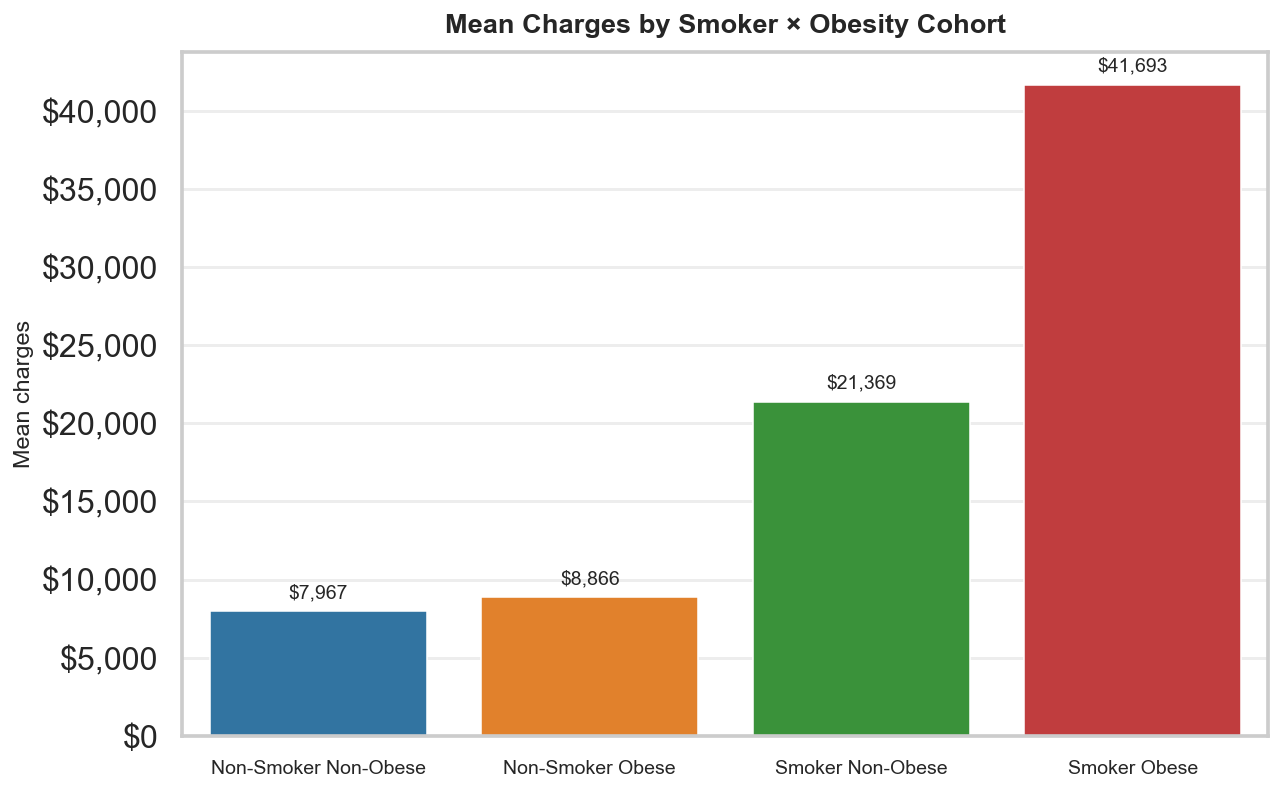

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# --- derive cohorts ---
df_plot = df[['smoker', 'bmi', 'charges']].dropna().copy()
df_plot['obese'] = df_plot['bmi'] > 30
df_plot['smoker_norm'] = (
    df_plot['smoker'].astype(str).str.strip().str.lower().map({'yes': 'smoker', 'no': 'non-smoker'})
)

df_plot['cohort'] = np.where(df_plot['obese'],
                             df_plot['smoker_norm'] + ' obese',
                             df_plot['smoker_norm'] + ' non-obese')

order = ["non-smoker non-obese", "non-smoker obese",
         "smoker non-obese", "smoker obese"]

grp = (df_plot.groupby('cohort', as_index=False)['charges']
              .mean()
              .set_index('cohort')
              .reindex(order)
              .reset_index())

sns.set_theme(style="whitegrid", context="talk")
fig, ax = plt.subplots(figsize=(9.5, 6))
palette = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728"]

ax = sns.barplot(
    data=grp, x='cohort', y='charges',
    order=order, palette=palette, ax=ax, edgecolor="white", linewidth=0.8
)

ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f"${x:,.0f}"))
for p in ax.patches:
    h = p.get_height()
    ax.annotate(f"${h:,.0f}",
                (p.get_x() + p.get_width()/2., h),
                ha='center', va='bottom', fontsize=10, xytext=(0, 5),
                textcoords='offset points')

ax.set_xlabel("")
ax.set_ylabel("Mean charges", fontsize=12)
ax.set_title("Mean Charges by Smoker × Obesity Cohort", fontsize=14)

ax.set_xticklabels([lbl.title() for lbl in order], fontsize=10)

plt.tight_layout()
plt.show()
